In [54]:
import numpy as np
import sklearn as sl
import csv
from collections import Counter
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

%matplotlib inline

# 1. Dataset loading

## Loading

In [55]:
def load(path):
    with open(path, 'r') as f:
        data = []
        reader = csv.reader(f, delimiter=',')
        t = False
        for l in reader:
            if len(l) > 0 and l[0] == "@data":
                t = True
                continue
            if t:
                d = []
                for v in l:
                    d.append(float(v))
                data.append(d)
        data = np.array(data)
        return data[:, 0:-1], data[:, -1]

### Test loading

In [56]:
x, y = load('../../res/noiseless_data/noiseless_all_testing_9class.arff')
print(x.shape)
print(y.shape)

(33334, 50)
(33334,)


## Utils

In [66]:
from sklearn.decomposition import PCA
import os

out_dir = '.ignore'

def plot_dataset(x,y):
    pca = PCA(n_components=2)
    x_d = pca.fit_transform(x)
    #plt.axis('equal')
    plt.scatter(x_d[:,0], x_d[:,1], c=y, marker='2')
    plt.xlim(-0.2, 0.2)
    plt.ylim(-0.1, 0.1)
    
def plot_ranges(x,y):
    t_min = np.amin(x, axis=0)
    t_max = np.amax(x, axis=0)
    t_mean = np.mean(x, axis=0)
    #plt.fill_between(range(t_min.shape[0]), t_min, t_max, facecolor='blue')
    plt.plot(range(t_min.shape[0]), t_min, 'b')
    plt.plot(range(t_max.shape[0]), t_max, 'b')
    plt.plot(range(t_mean.shape[0]), t_mean, 'k:')
    ax = plt.gca()
    ax.grid(True)
    plt.ylim(-0.1, 0.1)
    
def plot_class_dist(x,y, ylim=None):
    ctr = Counter(y)
    #plt.hist(y, bins=len(ctr), facecolor='blue', histtype=u'step', normed=False)
    #plt.fill_between(range(len(ctr)), [0]*len(ctr), [ctr[c] for c in sorted(list(ctr))], facecolor='blue')
    plt.plot(range(len(ctr)), [ctr[c] for c in sorted(list(ctr))], 'b')
    plt.ylim(bottom=0, top=None)
    plt.grid()
    print(ctr)
    
def analyse_dataset(x, y, plt_ranges=True, plt_classes=True, plt_instances=True):
    fig1 = plt.figure(figsize=(15,15))
    gs = gridspec.GridSpec(2, 2, width_ratios=[1, 1], height_ratios=[1, 4])
    
    if plt_ranges:
        plt.subplot(gs[0,0])
        plt.title("Ranges of inputs")
        plot_ranges(x,y)
    
    if plt_classes:
        plt.subplot(gs[0,1])
        plt.title("Class distribution")
        plot_class_dist(x,y)
    
    if plt_instances:
        plt.subplot(gs[1,:])
        plt.title("Instances")
        plot_dataset(train_x, train_y)
        
        print("Instances:", len(x))
        
    return fig1

def save_plot(figure, name):
    figure.savefig(name, bbox='tight')
    
def save_graph(dataset, f, filename):
    plt.figure(dpi=300)
    x, y = load(dataset)
    f(x,y)
    plt.savefig(os.path.join(out_dir, 'ds_'+filename), bbox='tight')
    
def save_all(dataset, file_prefix):
    save_graph(dataset, plot_dataset, file_prefix + '_instances.jpg')
    save_graph(dataset, plot_ranges, file_prefix + '_inputs.pdf')
    save_graph(dataset, plot_class_dist, file_prefix + '_outputs.pdf')

## Available datasets

In [62]:
noiseless_9class_train = '../../res/noiseless_data/noiseless_all_training_9class.arff'
noiseless_9class_test = '../../res/noiseless_data/noiseless_all_testing_9class.arff'
noiseless_256class_train = '../../res/noiseless_data/noiseless_all_training_256class.arff'
noiseless_256class_test = '../../res/noiseless_data/noiseless_all_testing_256class.arff'

noisy_9class_train = '../../res/noisy_data/noisy_all_training_9class.arff'
noisy_9class_test = '../../res/noisy_data/noisy_all_testing_9class.arff'
noisy_256class_train = '../../res/noisy_data/noisy_all_training_256class.arff'
noisy_256class_test = '../../res/noisy_data/noisy_all_testing_256class.arff'

## Store images

Counter({4.0: 18373, 5.0: 14492, 3.0: 14379, 6.0: 7458, 2.0: 7328, 7.0: 2060, 1.0: 2030, 0.0: 277, 8.0: 269})
Counter({4.0: 8999, 5.0: 7355, 3.0: 7308, 2.0: 3677, 6.0: 3626, 7.0: 1091, 1.0: 1015, 0.0: 149, 8.0: 114})
Counter({247.0: 298, 110.0: 297, 183.0: 297, 137.0: 297, 237.0: 296, 40.0: 296, 54.0: 294, 156.0: 294, 199.0: 293, 78.0: 291, 114.0: 291, 3.0: 291, 212.0: 291, 104.0: 290, 99.0: 290, 218.0: 288, 15.0: 287, 43.0: 287, 148.0: 287, 155.0: 286, 188.0: 285, 24.0: 284, 94.0: 284, 27.0: 284, 172.0: 283, 97.0: 283, 95.0: 283, 182.0: 282, 229.0: 282, 60.0: 282, 225.0: 282, 238.0: 281, 71.0: 281, 207.0: 280, 129.0: 279, 143.0: 279, 139.0: 278, 111.0: 278, 108.0: 278, 204.0: 278, 46.0: 278, 150.0: 278, 168.0: 277, 0.0: 277, 173.0: 277, 194.0: 276, 63.0: 276, 177.0: 276, 208.0: 276, 240.0: 275, 14.0: 275, 189.0: 275, 107.0: 275, 131.0: 275, 66.0: 275, 126.0: 275, 149.0: 275, 62.0: 275, 219.0: 274, 85.0: 274, 175.0: 274, 49.0: 274, 44.0: 273, 20.0: 273, 210.0: 273, 1.0: 273, 51.0: 272,

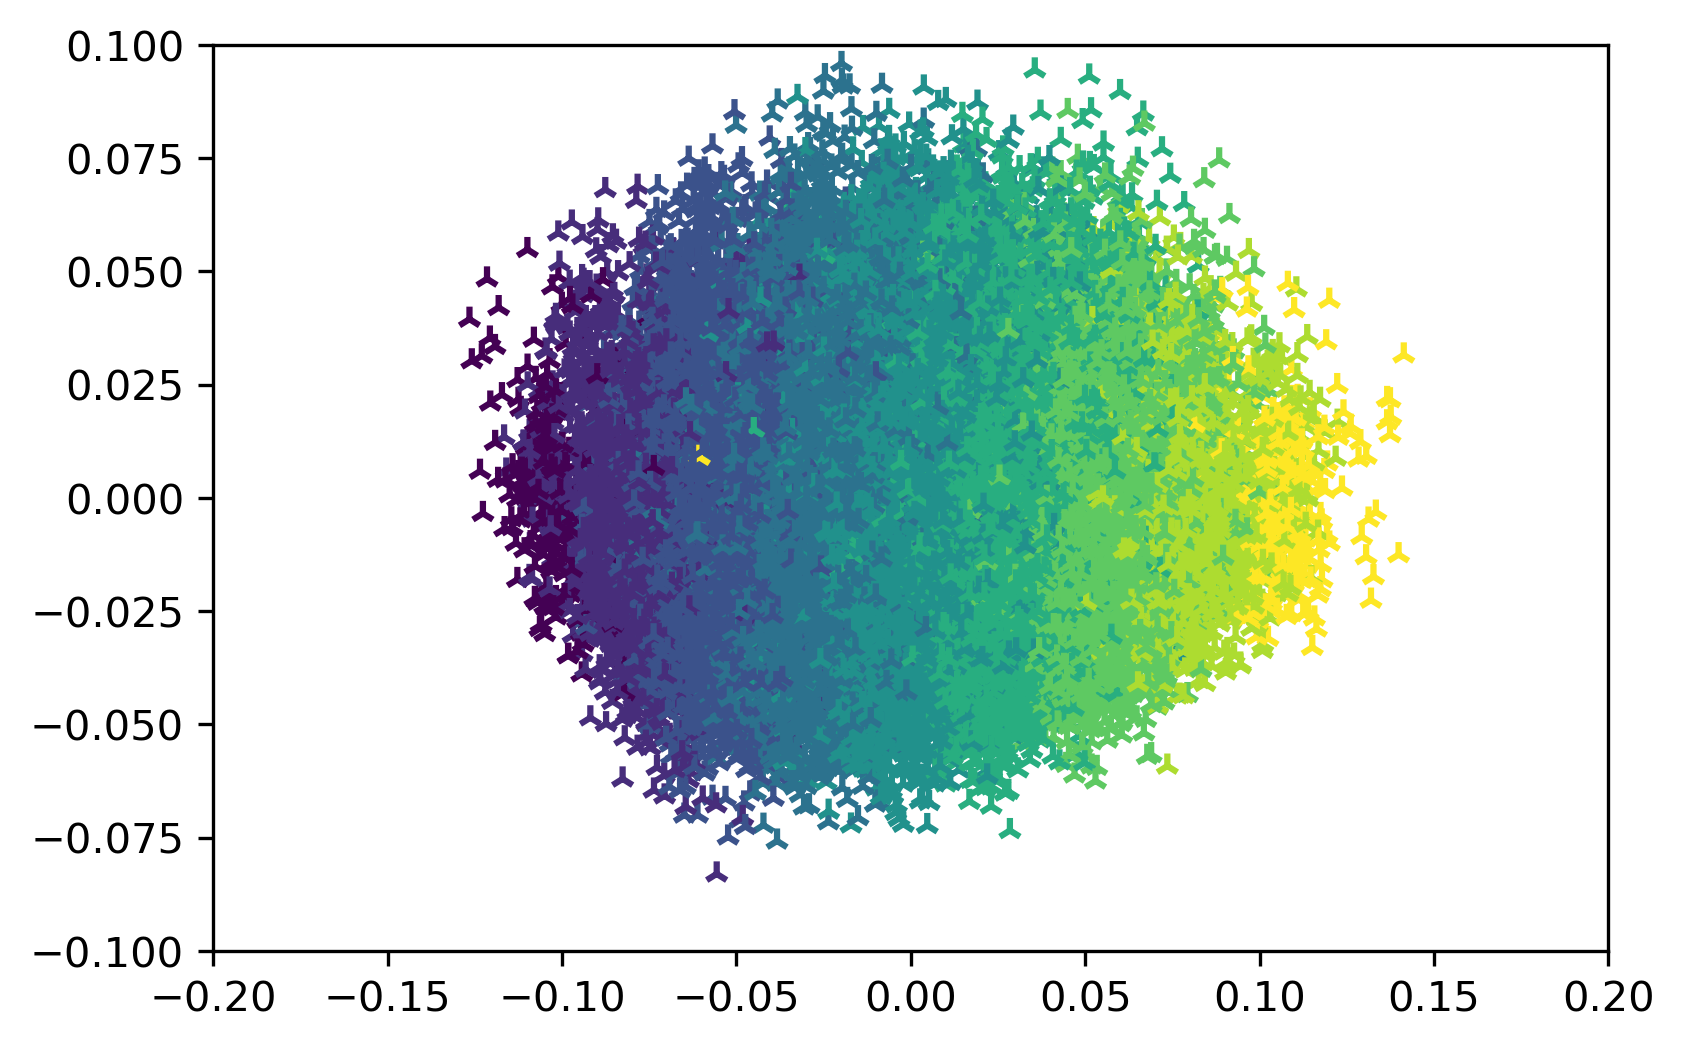

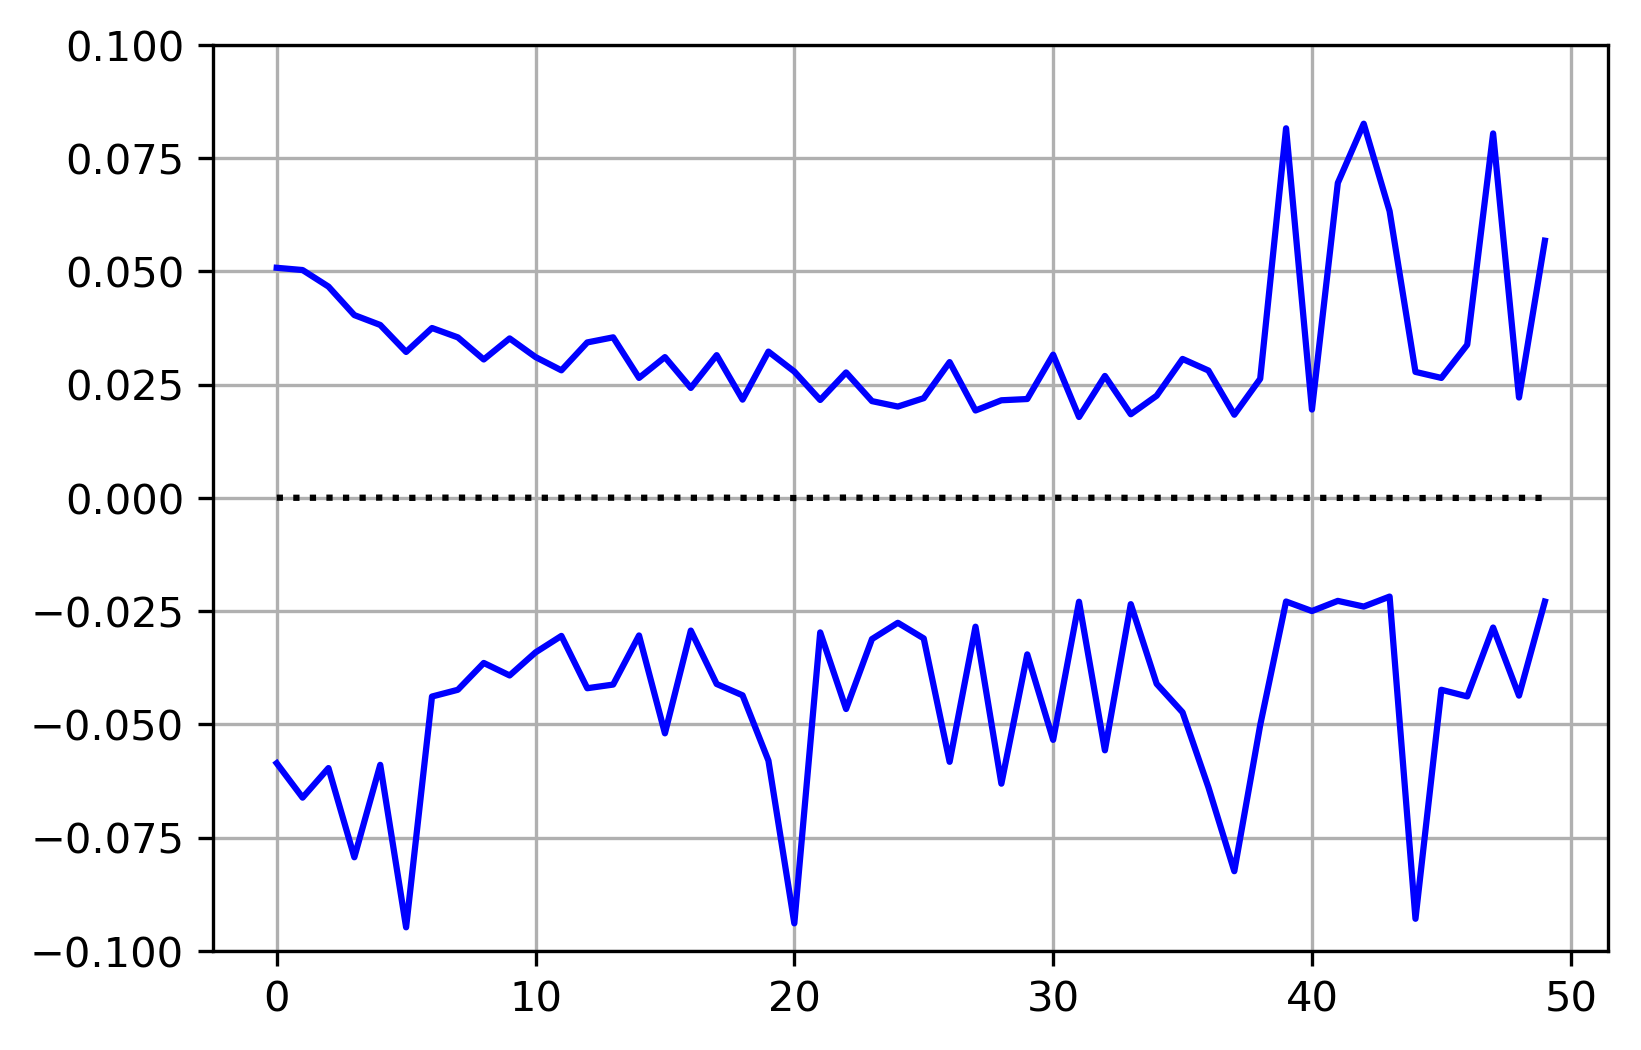

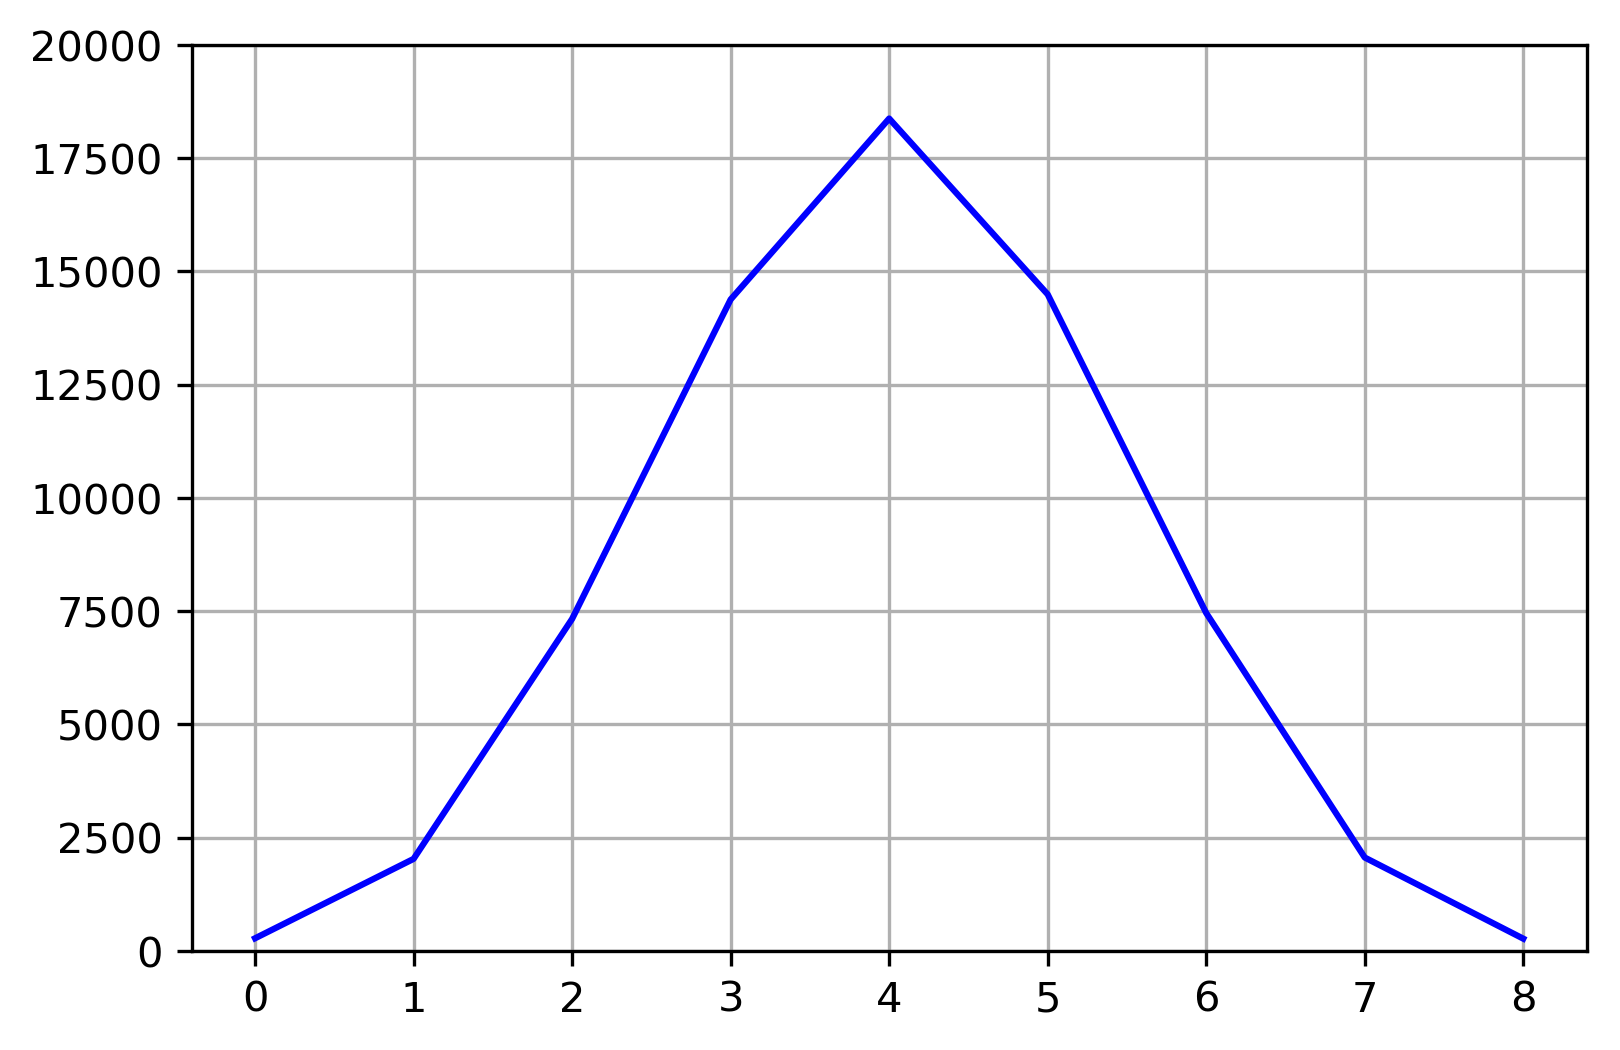

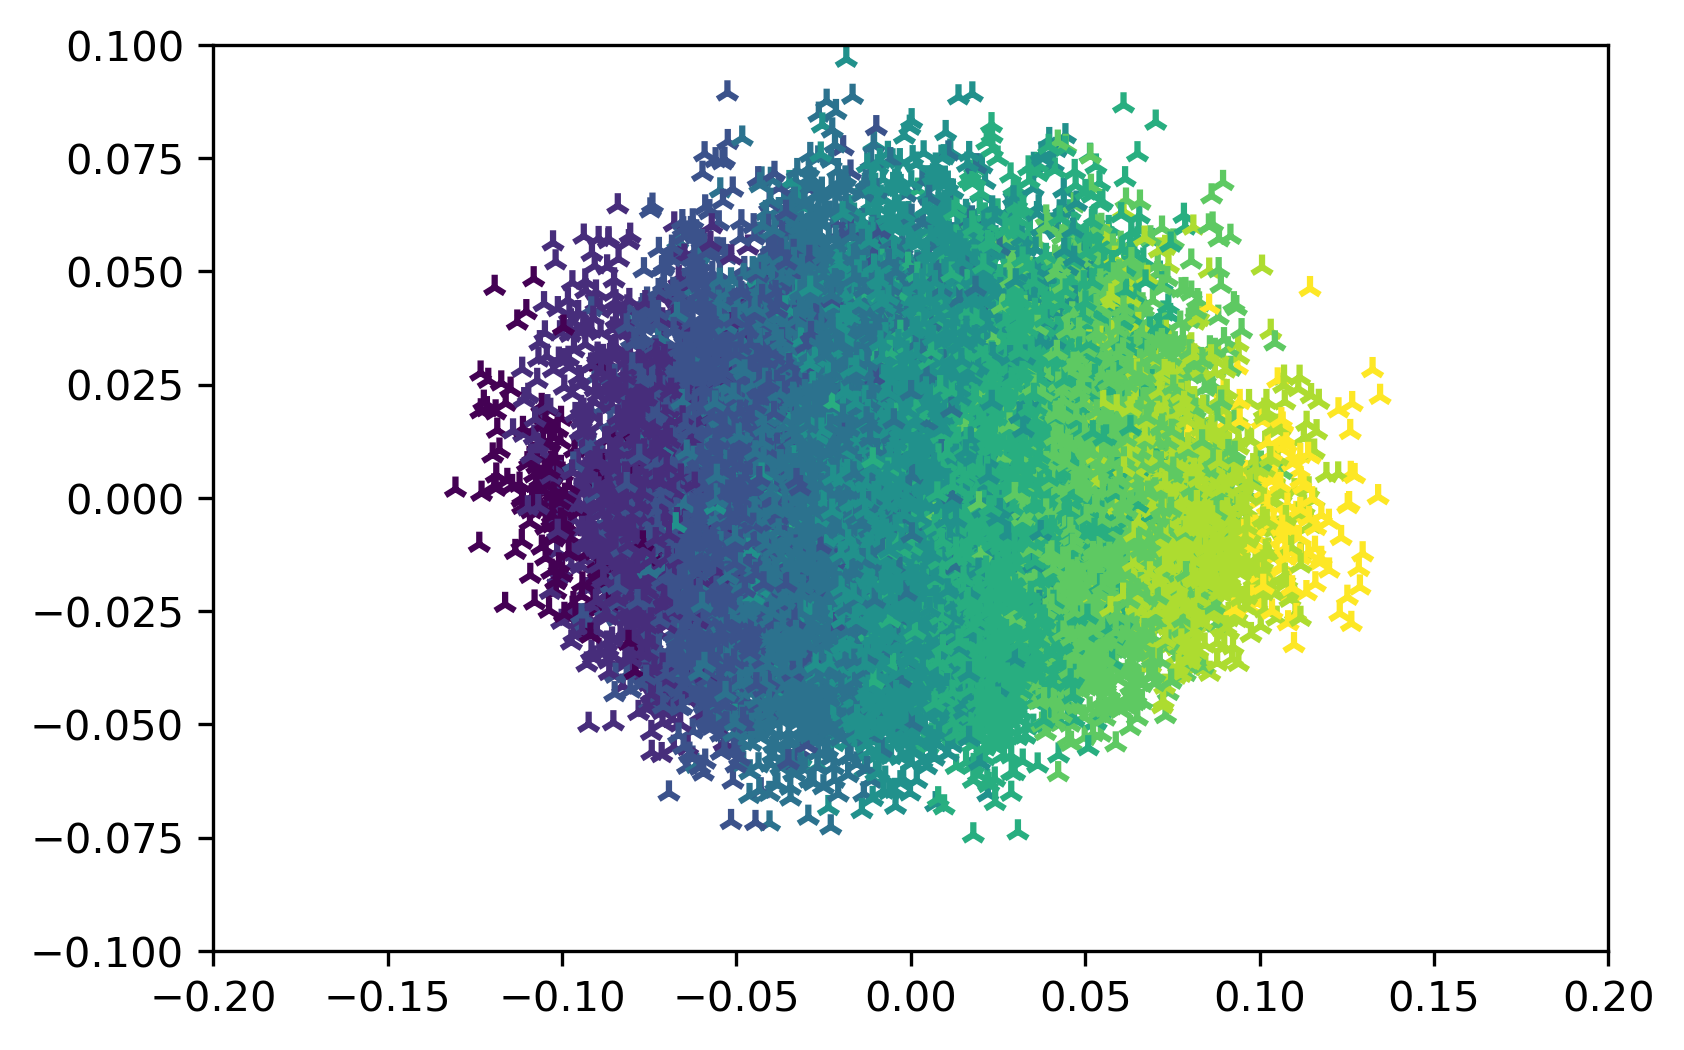

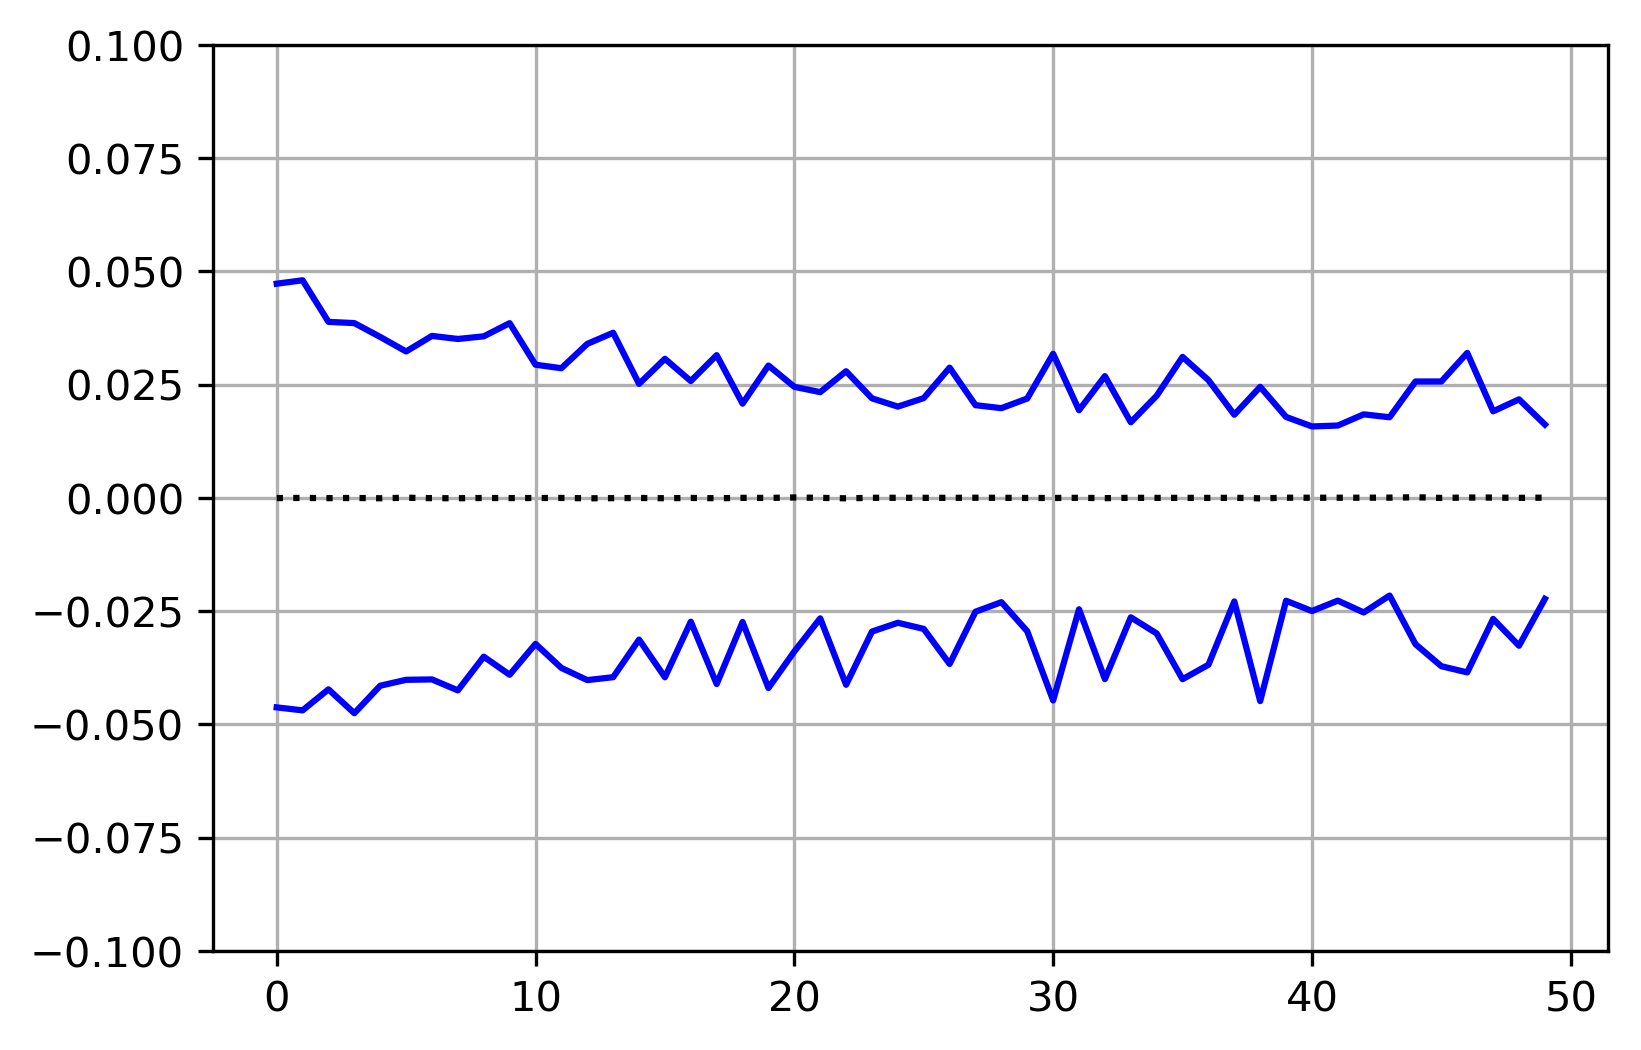

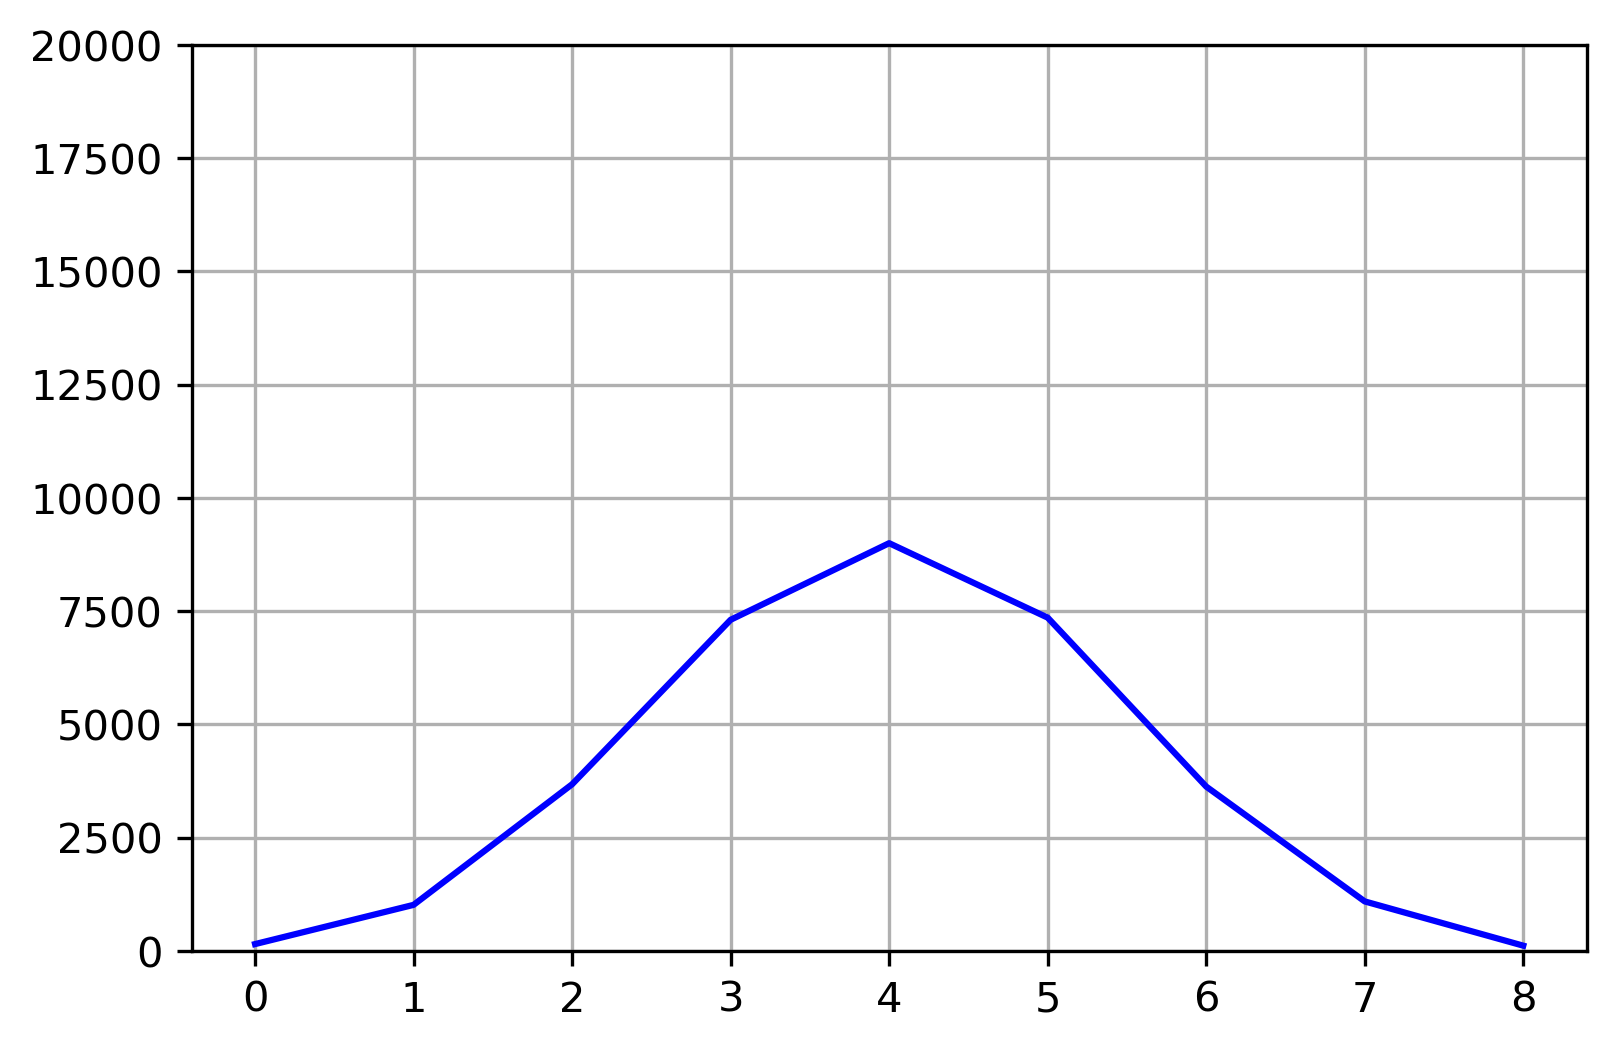

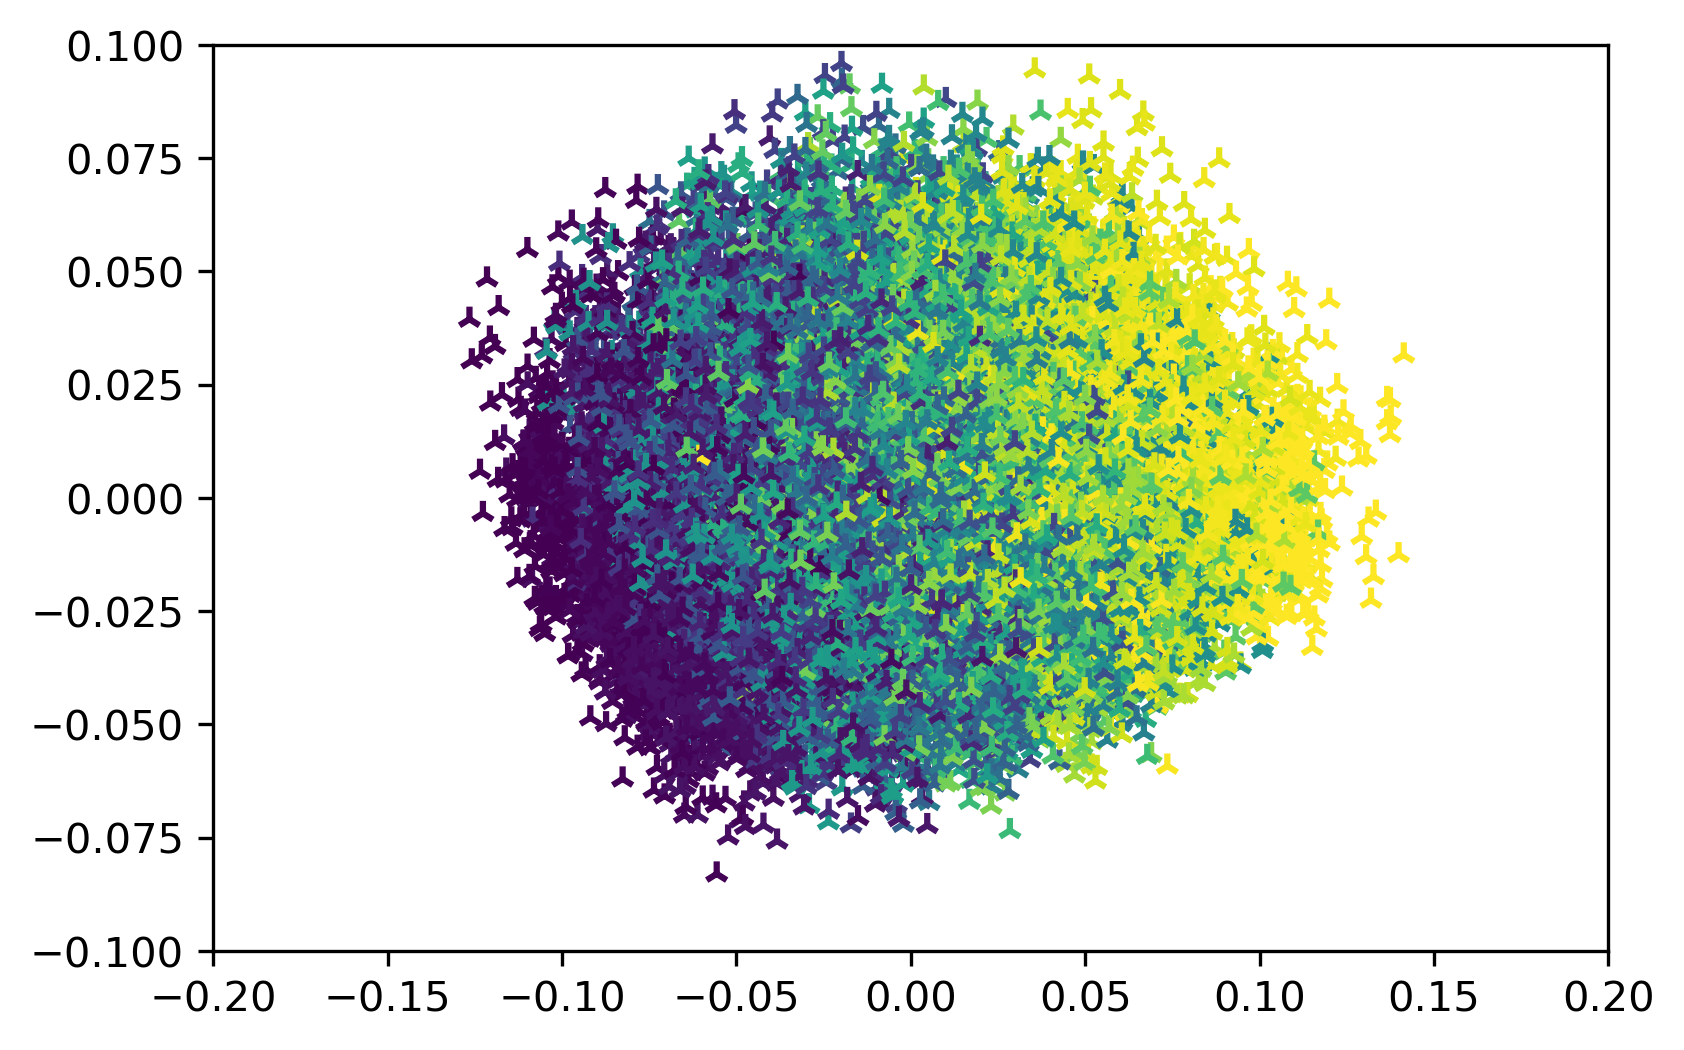

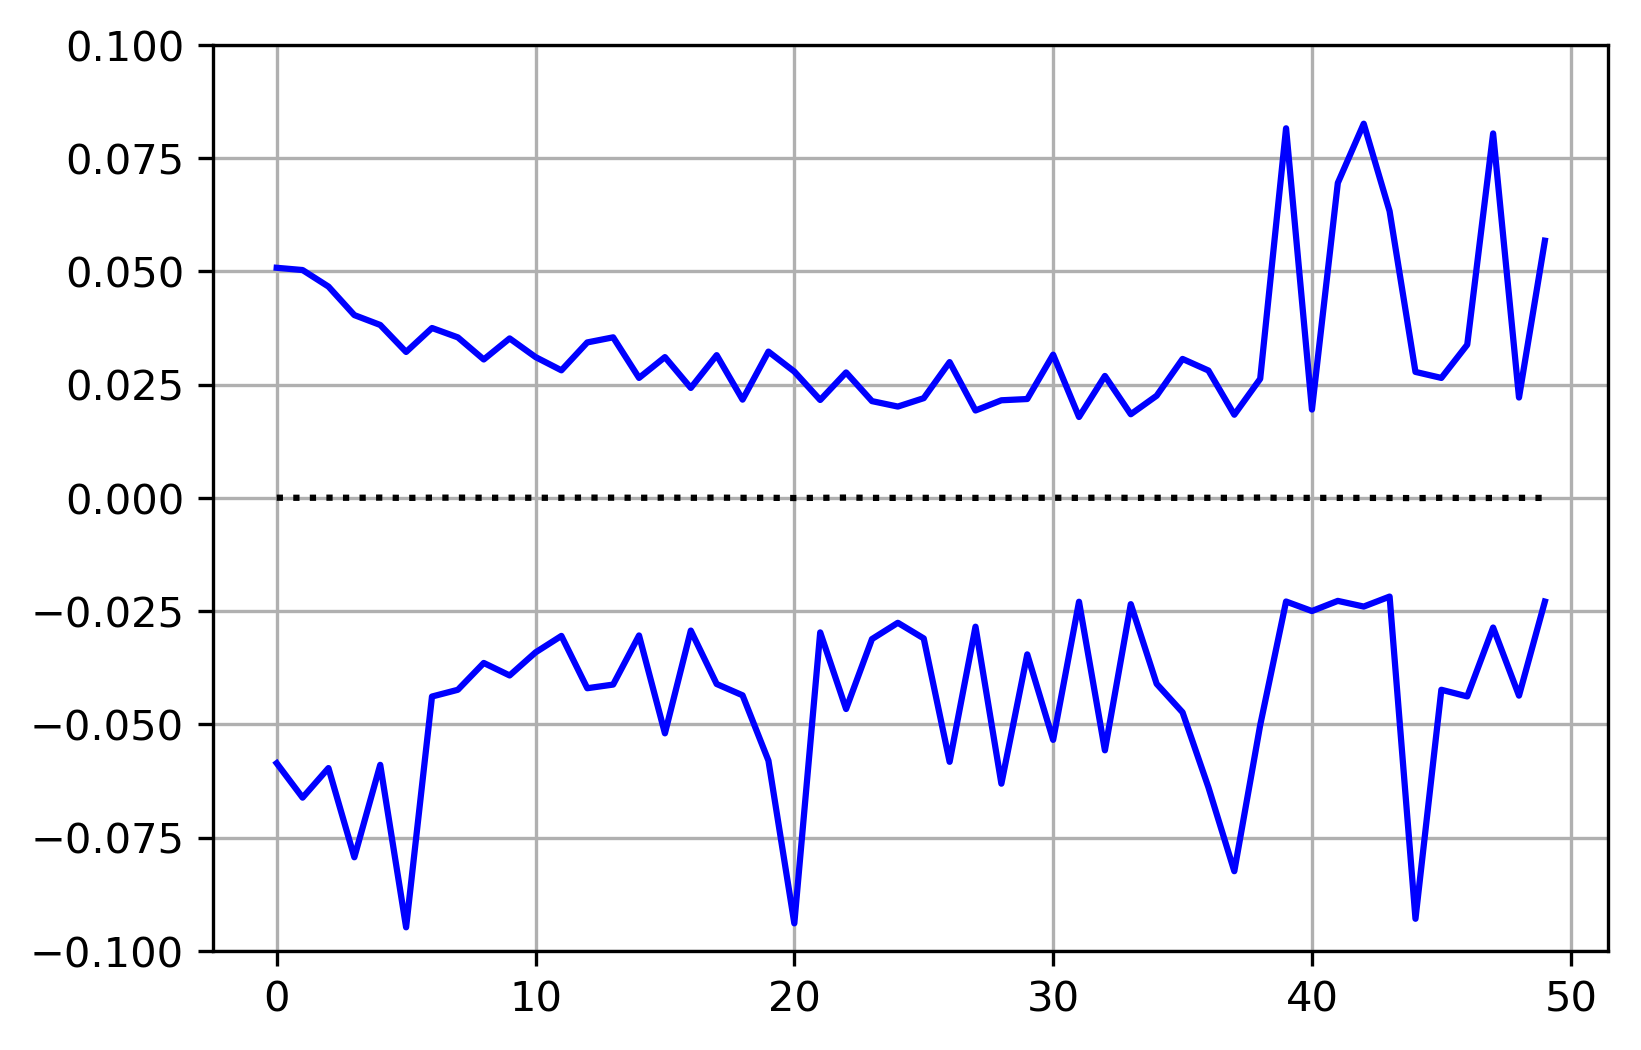

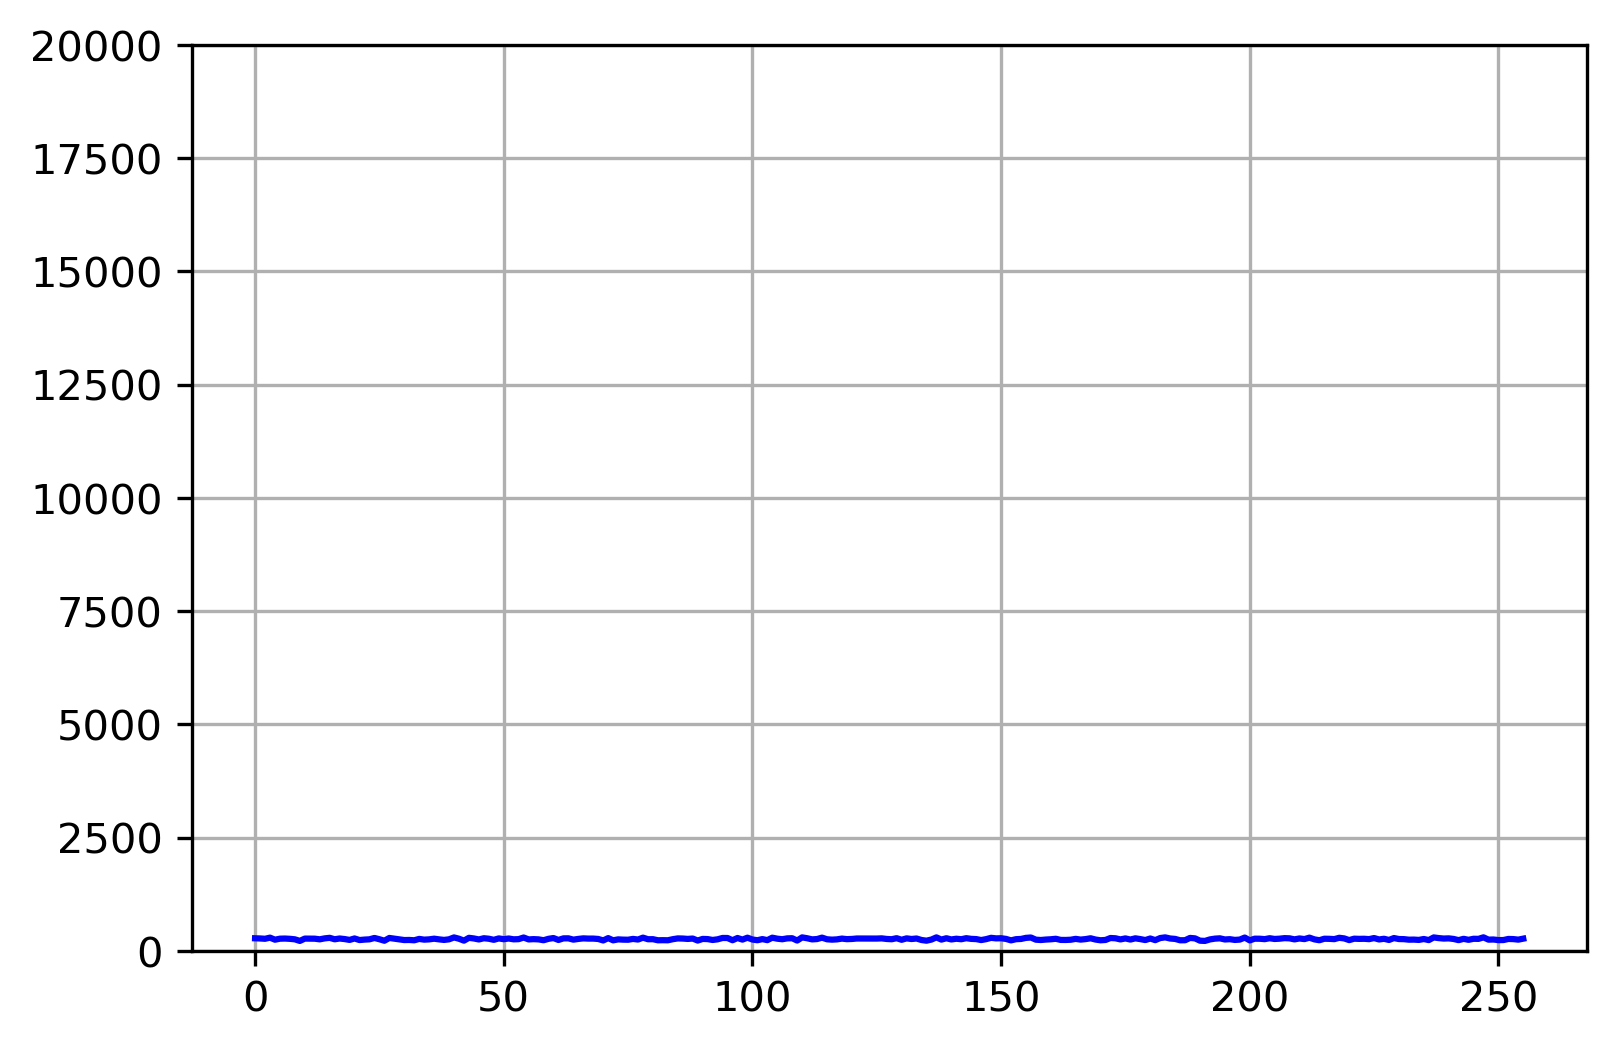

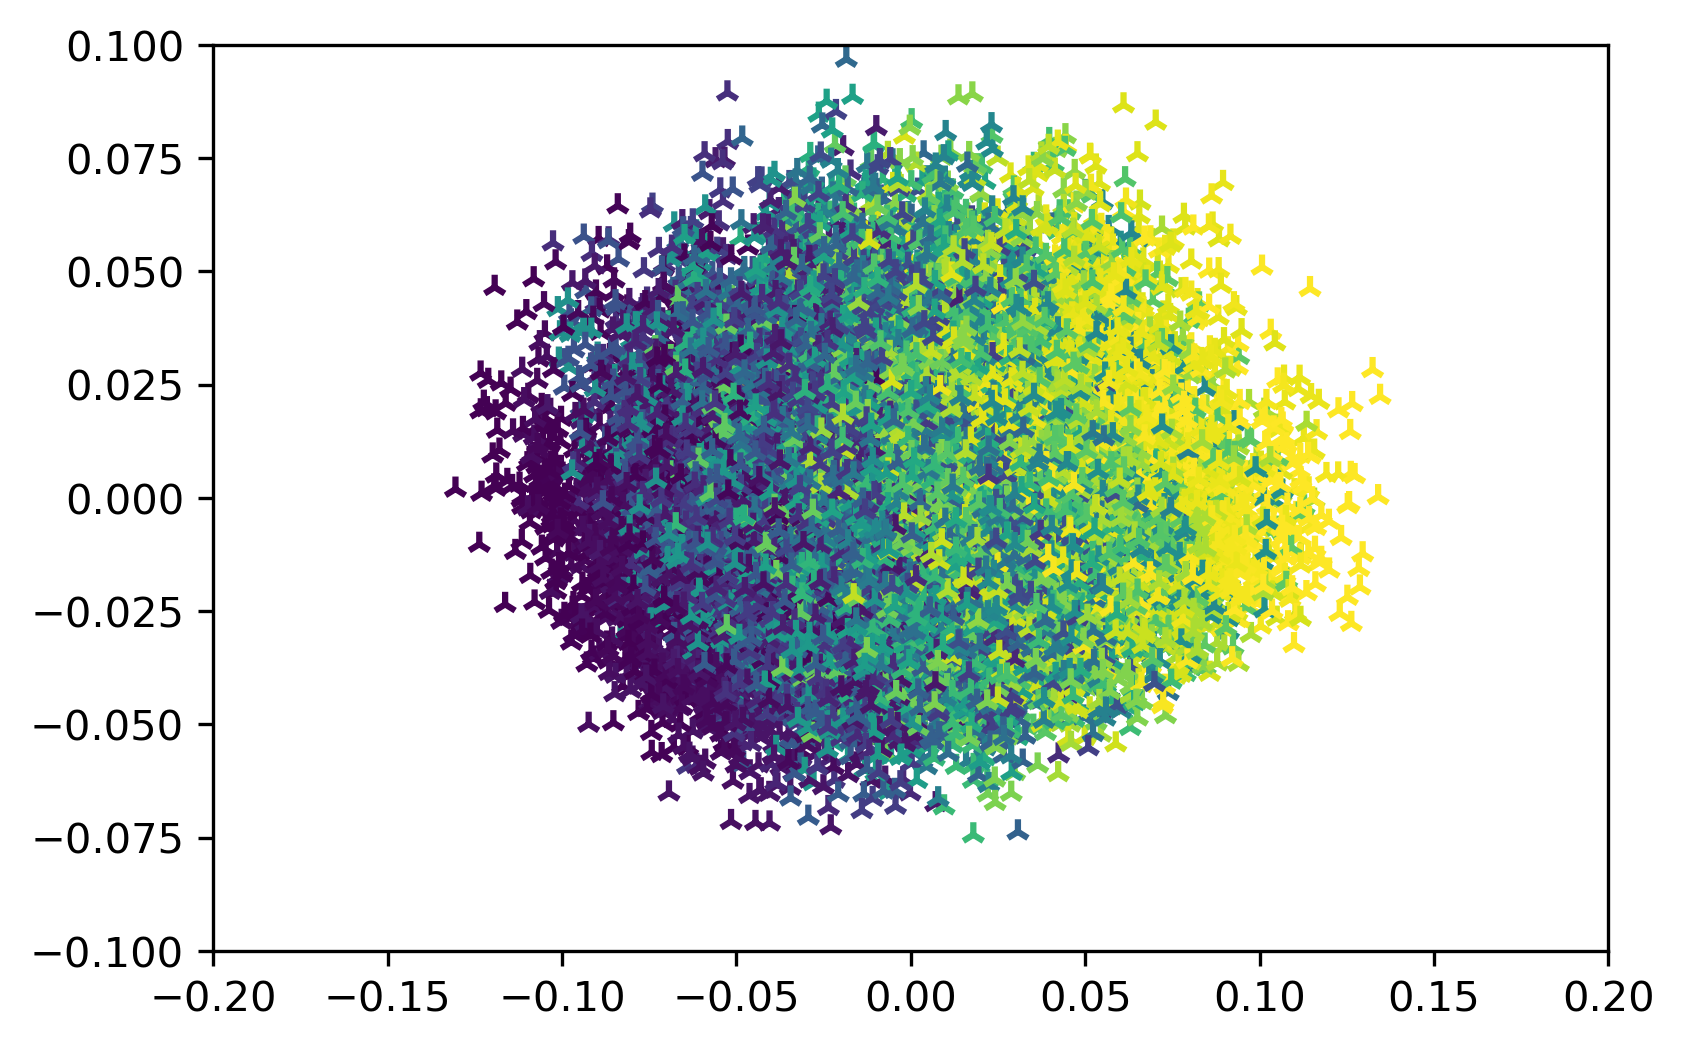

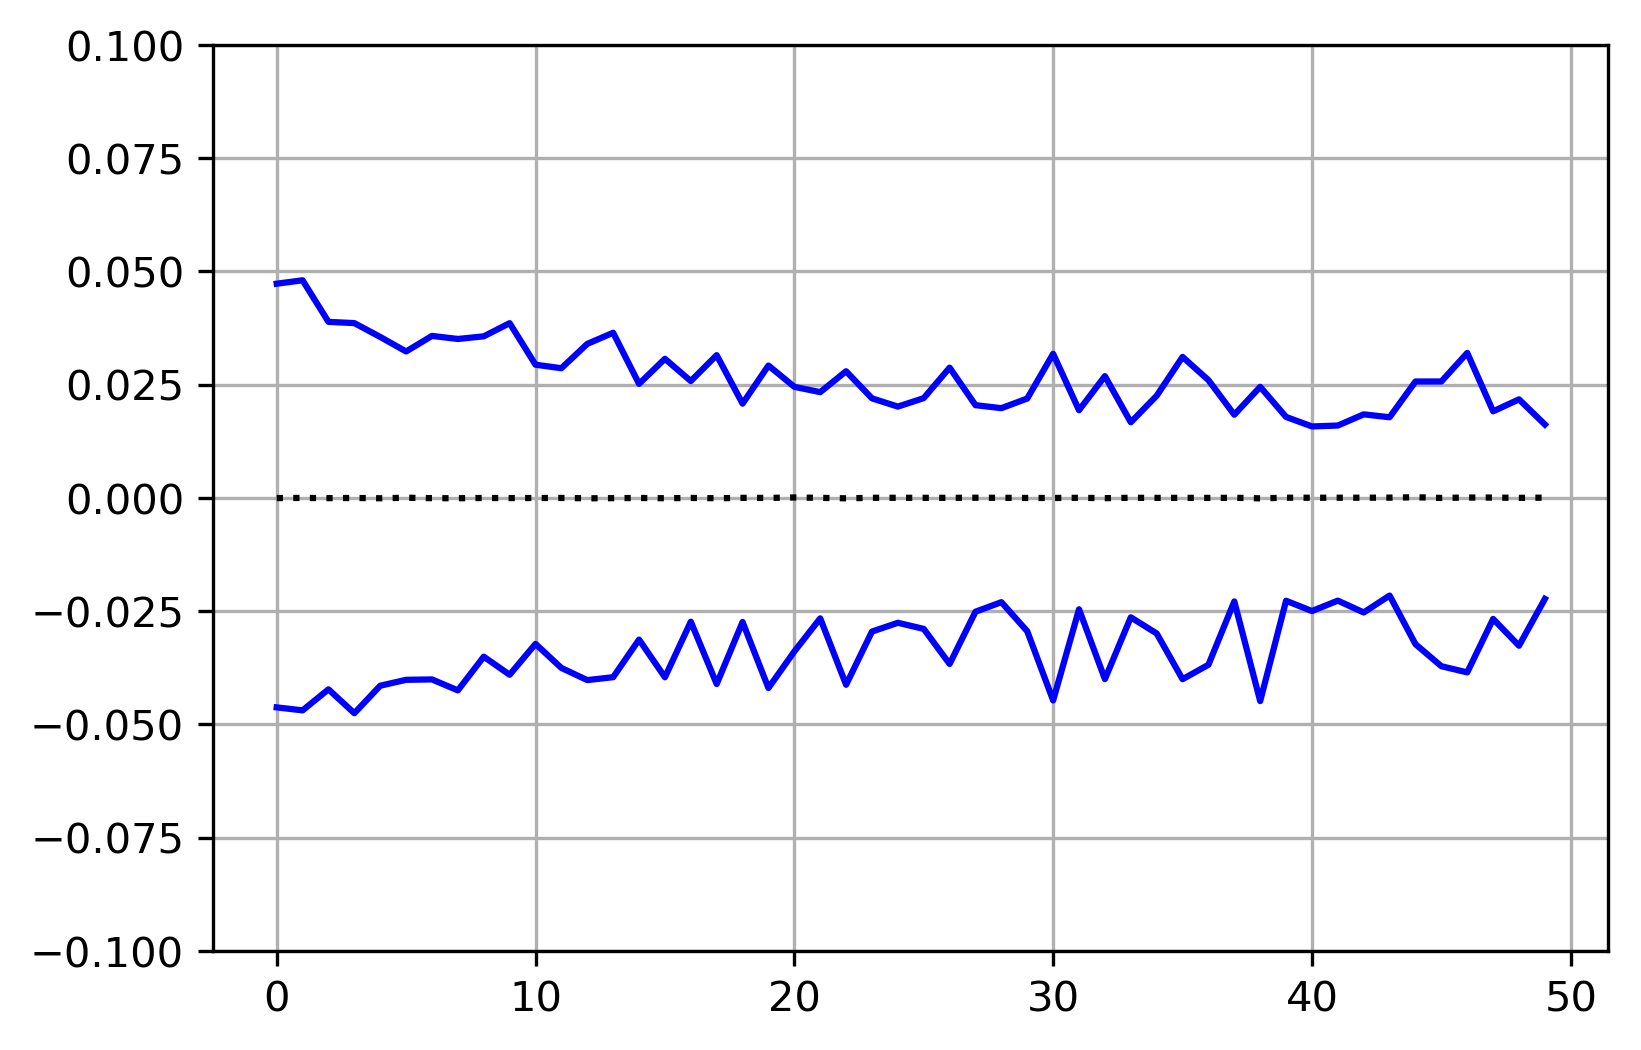

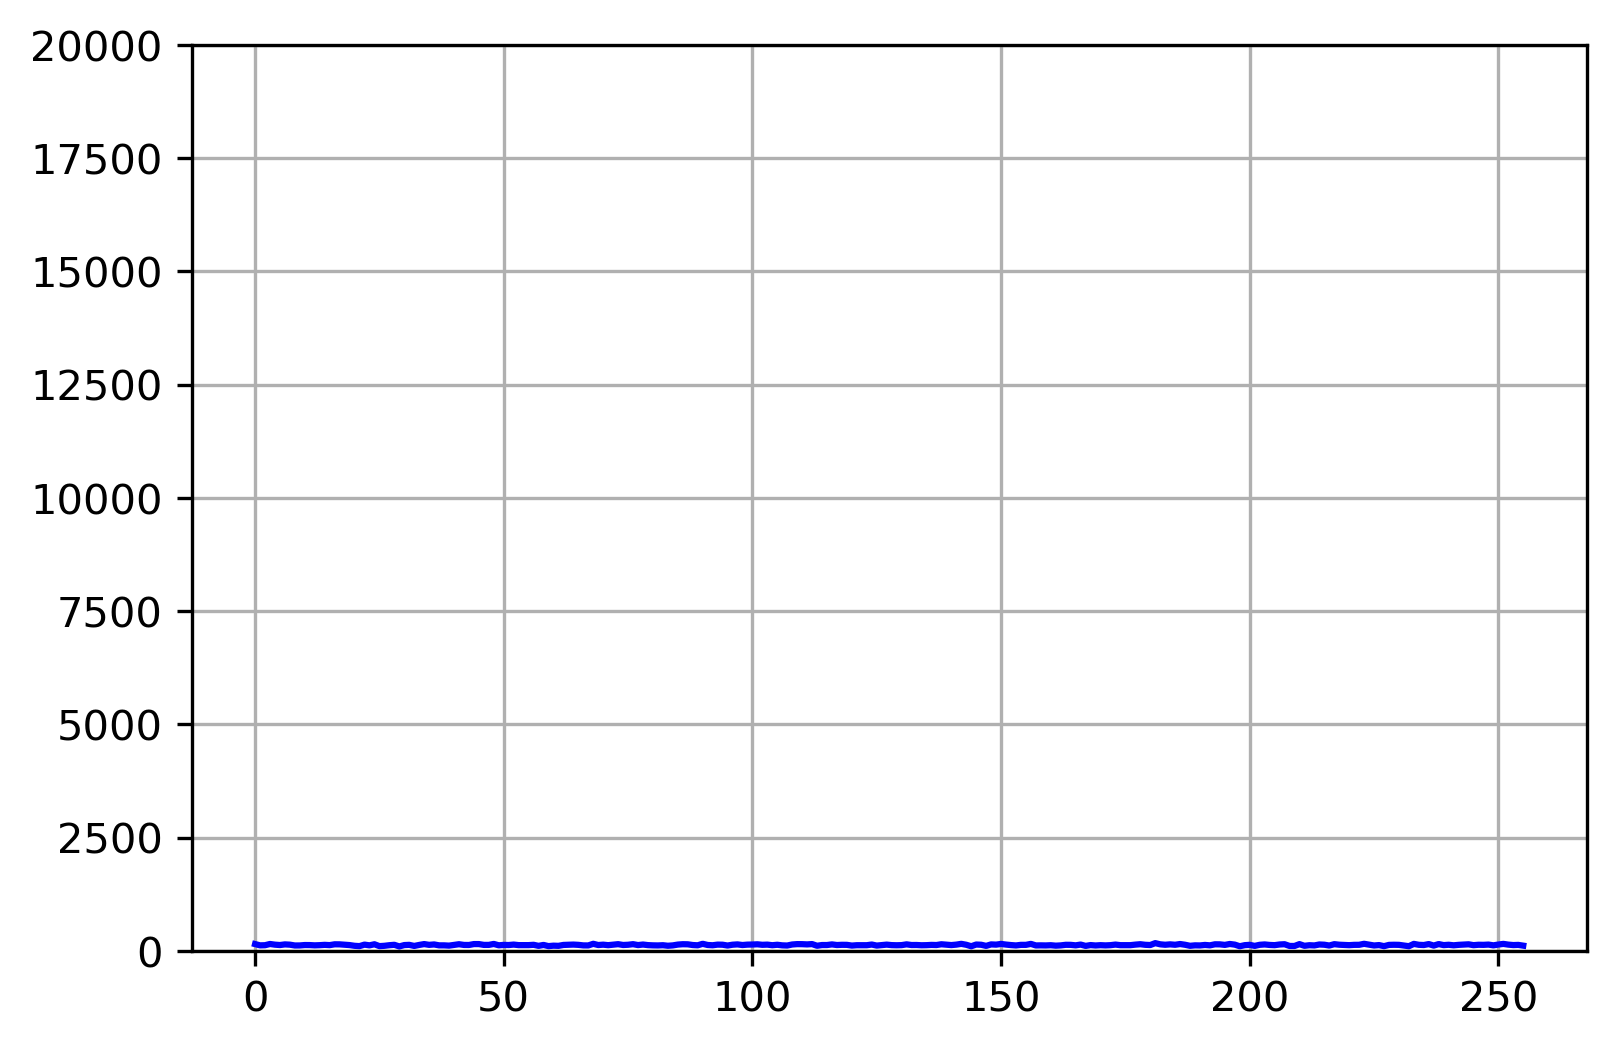

In [67]:
save_all(noiseless_9class_train, 'nl9_tr')
save_all(noiseless_9class_test, 'nl9_ts')

save_all(noiseless_256class_train, 'nl256_tr')
save_all(noiseless_256class_test, 'nl256_ts')

# 2. Noiseless

##  2.1 Noiseless - Hamming distance (9 class)

### Train

In [20]:
train_x, train_y = load(noiseless_9class_train)

Counter({4.0: 18373, 5.0: 14492, 3.0: 14379, 6.0: 7458, 2.0: 7328, 7.0: 2060, 1.0: 2030, 0.0: 277, 8.0: 269})
Instances: 66666


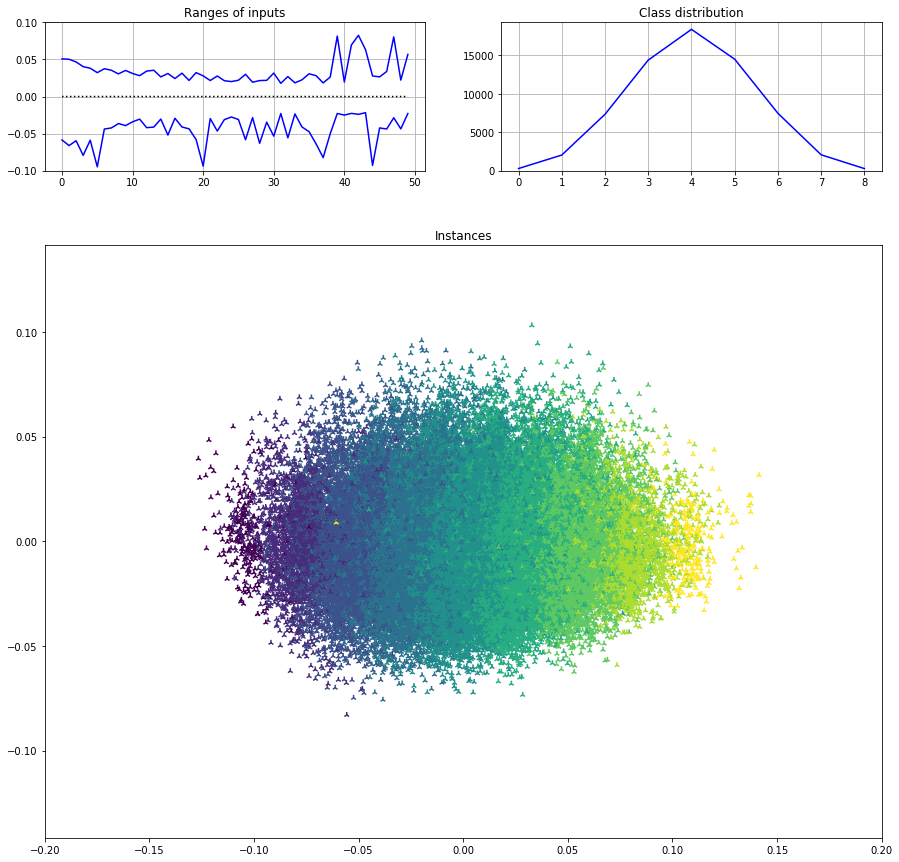

In [21]:
f = analyse_dataset(train_x, train_y)
#save_plot(f, "image.pdf")

### Test

In [22]:
test_x, test_y = load(noiseless_9class_test)

Counter({4.0: 8999, 5.0: 7355, 3.0: 7308, 2.0: 3677, 6.0: 3626, 7.0: 1091, 1.0: 1015, 0.0: 149, 8.0: 114})
Instances: 33334


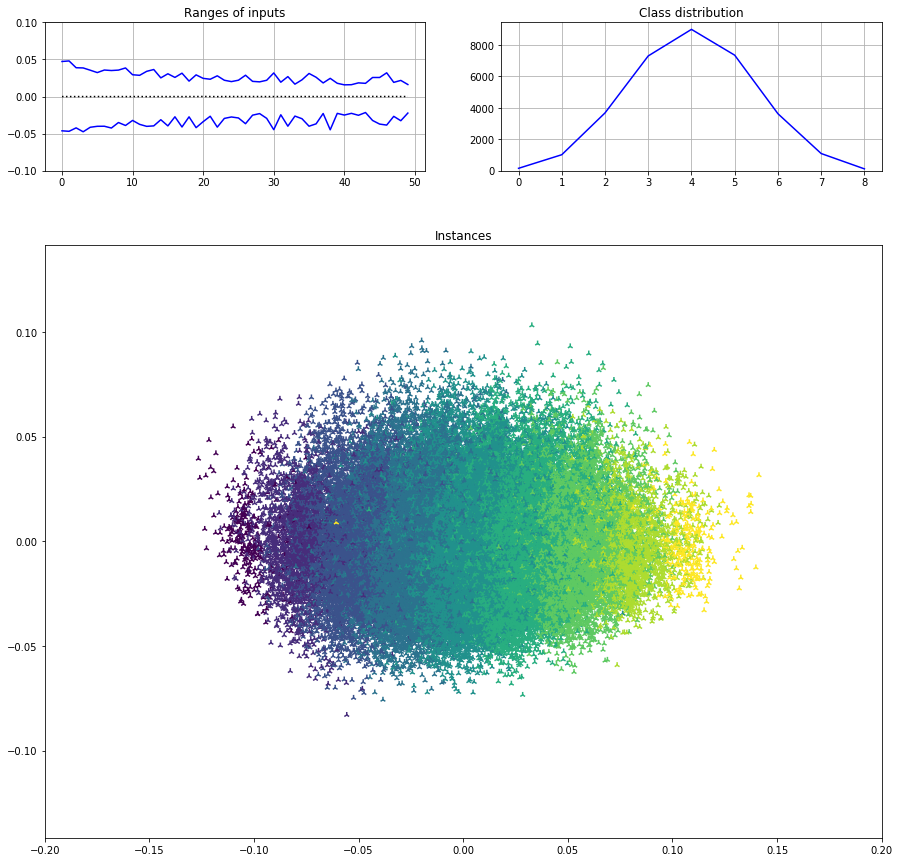

In [23]:
f = analyse_dataset(test_x, test_y)

### Joined

In [24]:
X = np.vstack([train_x, test_x])
Y = np.concatenate([train_y, test_y])

Counter({4.0: 27372, 5.0: 21847, 3.0: 21687, 6.0: 11084, 2.0: 11005, 7.0: 3151, 1.0: 3045, 0.0: 426, 8.0: 383})
Instances: 100000


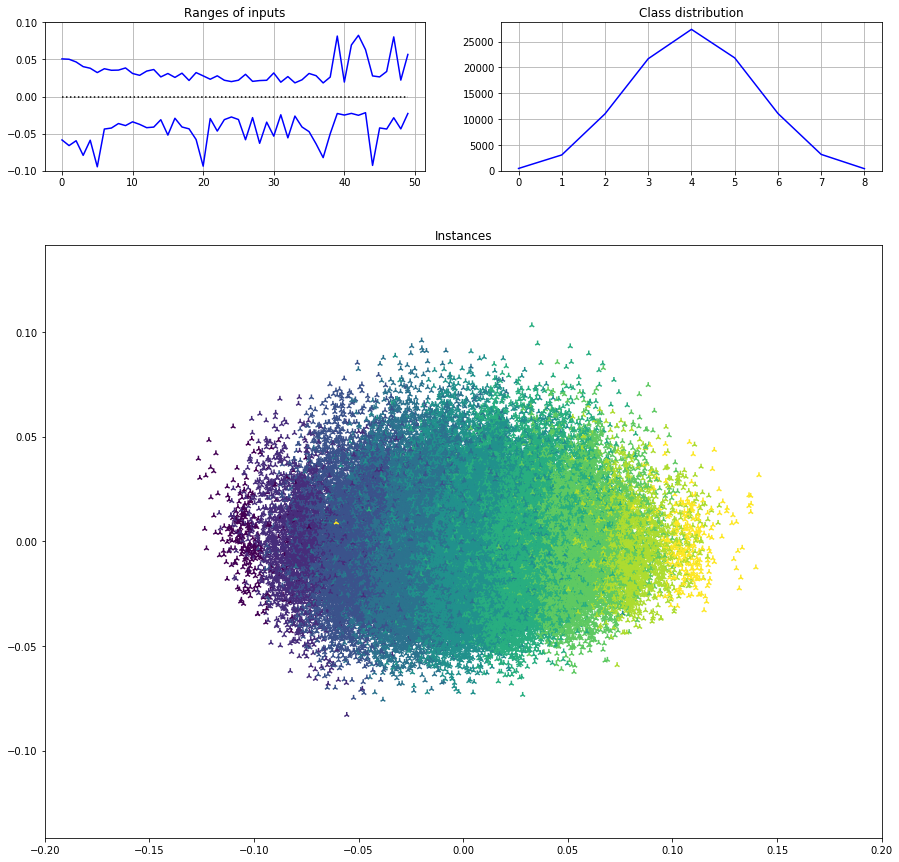

In [25]:
f = analyse_dataset(X, Y)

## 2.2 Noiseless - Original byte (256 class)

### Train

In [26]:
train_x, train_y = load(noiseless_256class_train)

Counter({247.0: 298, 110.0: 297, 183.0: 297, 137.0: 297, 237.0: 296, 40.0: 296, 54.0: 294, 156.0: 294, 199.0: 293, 78.0: 291, 114.0: 291, 3.0: 291, 212.0: 291, 104.0: 290, 99.0: 290, 218.0: 288, 15.0: 287, 43.0: 287, 148.0: 287, 155.0: 286, 188.0: 285, 24.0: 284, 94.0: 284, 27.0: 284, 172.0: 283, 97.0: 283, 95.0: 283, 182.0: 282, 229.0: 282, 60.0: 282, 225.0: 282, 238.0: 281, 71.0: 281, 207.0: 280, 129.0: 279, 143.0: 279, 139.0: 278, 111.0: 278, 108.0: 278, 204.0: 278, 46.0: 278, 150.0: 278, 168.0: 277, 0.0: 277, 173.0: 277, 194.0: 276, 63.0: 276, 177.0: 276, 208.0: 276, 240.0: 275, 14.0: 275, 189.0: 275, 107.0: 275, 131.0: 275, 66.0: 275, 126.0: 275, 149.0: 275, 62.0: 275, 219.0: 274, 85.0: 274, 175.0: 274, 49.0: 274, 44.0: 273, 20.0: 273, 210.0: 273, 1.0: 273, 51.0: 272, 17.0: 272, 180.0: 272, 121.0: 272, 184.0: 272, 133.0: 272, 124.0: 271, 6.0: 271, 122.0: 271, 88.0: 271, 239.0: 271, 86.0: 271, 125.0: 271, 123.0: 271, 10.0: 270, 118.0: 270, 67.0: 270, 11.0: 270, 68.0: 270, 193.0: 26

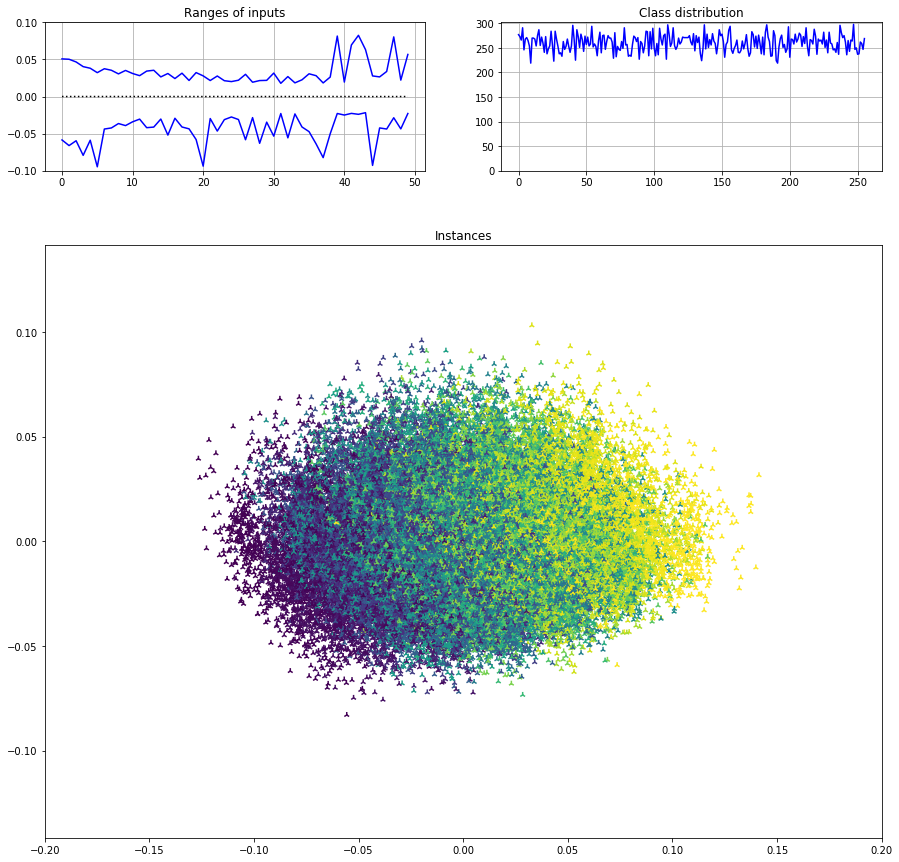

In [27]:
f = analyse_dataset(train_x, train_y)

### Test

In [28]:
test_x, test_y = load(noiseless_256class_test)

Counter({181.0: 170, 90.0: 155, 68.0: 155, 223.0: 155, 142.0: 154, 156.0: 153, 233.0: 153, 251.0: 153, 48.0: 152, 150.0: 152, 196.0: 151, 3.0: 151, 186.0: 150, 0.0: 149, 236.0: 149, 44.0: 149, 112.0: 149, 238.0: 149, 45.0: 149, 34.0: 149, 210.0: 148, 109.0: 148, 73.0: 147, 110.0: 147, 217.0: 147, 76.0: 147, 207.0: 146, 41.0: 146, 178.0: 146, 86.0: 146, 138.0: 145, 24.0: 145, 193.0: 144, 16.0: 144, 244.0: 144, 101.0: 144, 182.0: 144, 87.0: 144, 184.0: 143, 194.0: 143, 17.0: 143, 131.0: 143, 116.0: 142, 97.0: 142, 6.0: 142, 111.0: 142, 148.0: 142, 203.0: 141, 36.0: 141, 214.0: 140, 206.0: 140, 108.0: 140, 78.0: 139, 243.0: 139, 250.0: 139, 124.0: 139, 145.0: 139, 100.0: 139, 64.0: 138, 248.0: 138, 52.0: 138, 85.0: 138, 151.0: 138, 173.0: 138, 166.0: 138, 141.0: 137, 197.0: 137, 99.0: 137, 252.0: 137, 93.0: 137, 139.0: 137, 127.0: 137, 103.0: 137, 224.0: 137, 22.0: 137, 177.0: 137, 149.0: 137, 7.0: 136, 72.0: 136, 70.0: 136, 4.0: 136, 94.0: 135, 218.0: 135, 63.0: 135, 215.0: 135, 96.0: 13

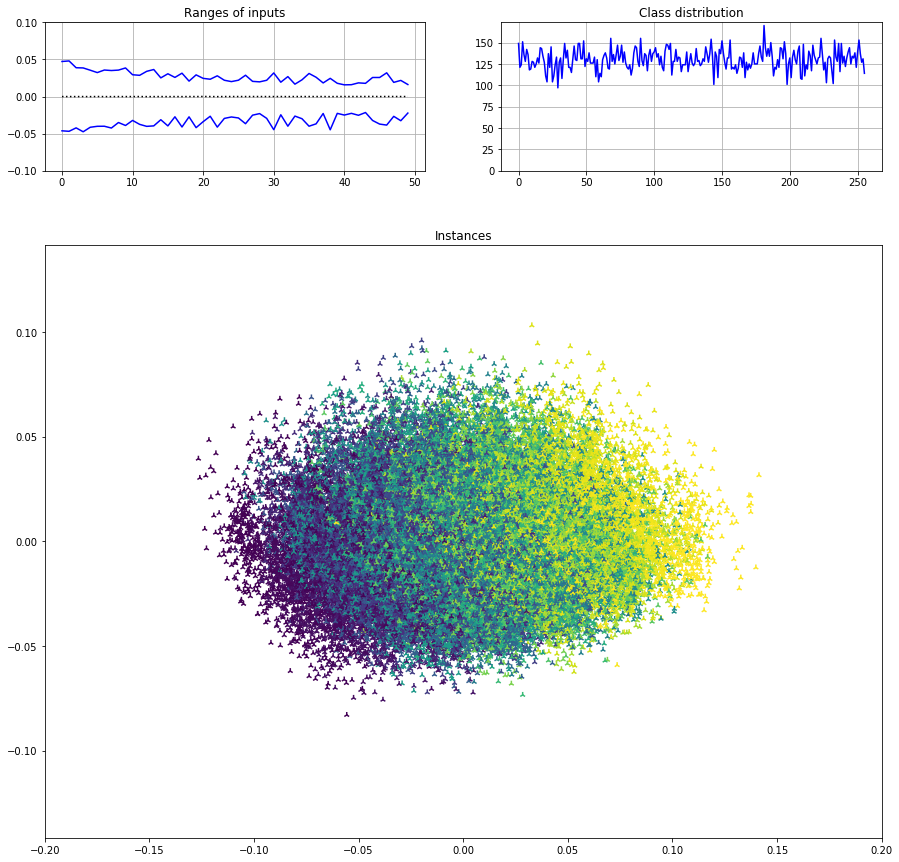

In [29]:
f = analyse_dataset(test_x, test_y)

### Joined

In [30]:
X = np.vstack([train_x, test_x])
Y = np.concatenate([train_y, test_y])

Counter({156.0: 447, 110.0: 444, 3.0: 442, 183.0: 431, 238.0: 430, 78.0: 430, 247.0: 430, 150.0: 430, 148.0: 429, 24.0: 429, 99.0: 427, 182.0: 426, 40.0: 426, 0.0: 426, 207.0: 426, 97.0: 425, 137.0: 425, 68.0: 425, 218.0: 423, 44.0: 422, 223.0: 421, 210.0: 421, 54.0: 420, 111.0: 420, 114.0: 419, 194.0: 419, 94.0: 419, 131.0: 418, 155.0: 418, 199.0: 418, 108.0: 418, 90.0: 418, 86.0: 417, 43.0: 416, 229.0: 416, 17.0: 415, 139.0: 415, 184.0: 415, 212.0: 415, 173.0: 415, 104.0: 414, 193.0: 413, 6.0: 413, 15.0: 413, 41.0: 413, 177.0: 413, 143.0: 413, 237.0: 412, 149.0: 412, 85.0: 412, 63.0: 411, 124.0: 410, 142.0: 410, 76.0: 410, 240.0: 409, 46.0: 409, 36.0: 409, 196.0: 408, 172.0: 408, 206.0: 408, 204.0: 408, 27.0: 408, 87.0: 407, 14.0: 407, 71.0: 406, 181.0: 406, 178.0: 405, 217.0: 405, 62.0: 405, 141.0: 404, 168.0: 404, 243.0: 404, 219.0: 404, 118.0: 403, 112.0: 402, 126.0: 402, 215.0: 402, 129.0: 402, 105.0: 402, 28.0: 401, 151.0: 401, 133.0: 401, 233.0: 401, 7.0: 401, 51.0: 400, 180.0:

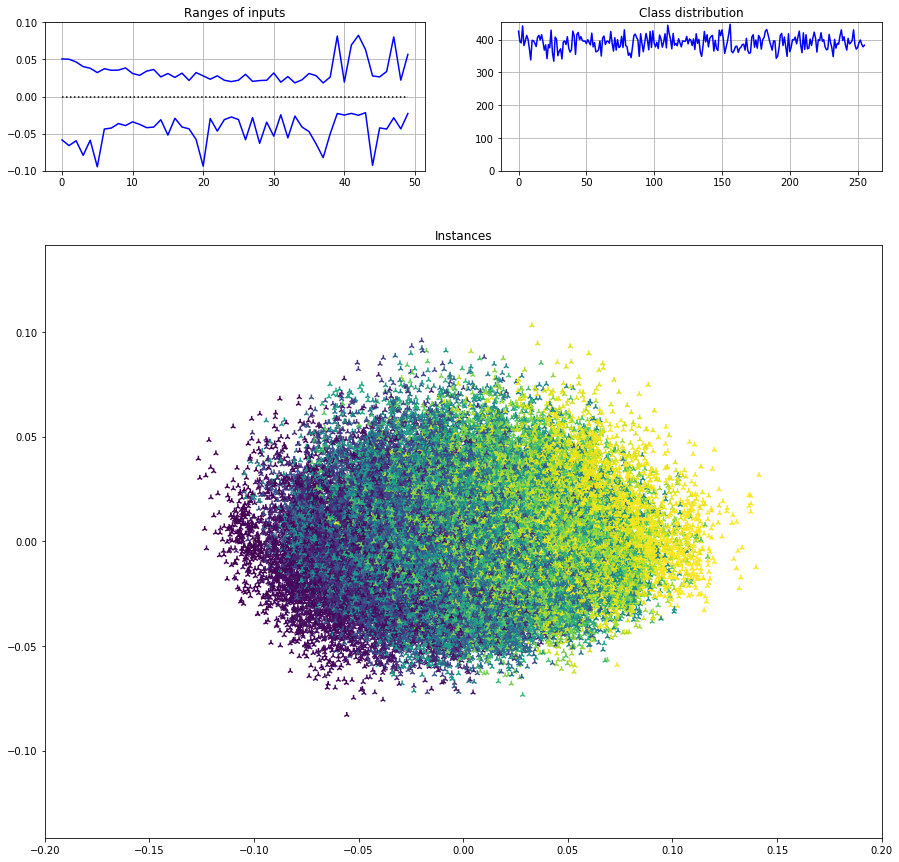

In [31]:
f = analyse_dataset(X, Y)

# 3. Noisy

## 3.1 Noisy - Hamming distance (9 class)

### Train

In [52]:
train_x, train_y = load(noisy_9class_train)

Counter({4.0: 18298, 5.0: 14533, 3.0: 14533, 2.0: 7302, 6.0: 7300, 1.0: 2114, 7.0: 2080, 0.0: 278, 8.0: 228})
Instances: 66666


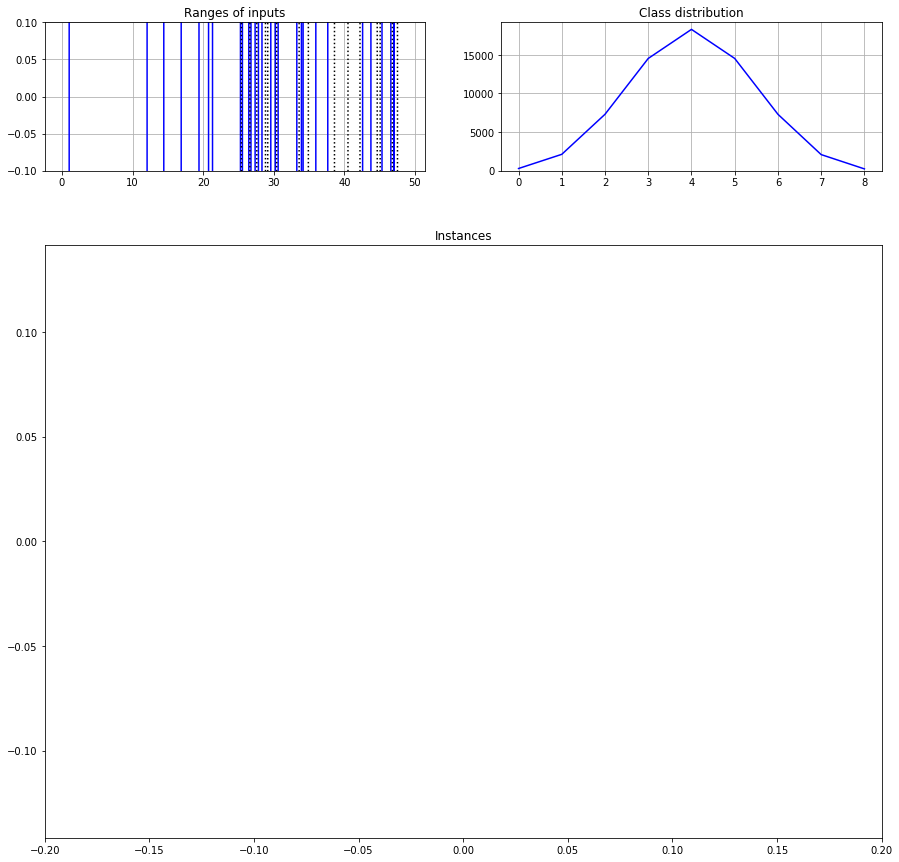

In [53]:
f = analyse_dataset(train_x, train_y)

### Test

In [34]:
test_x, test_y = load(noisy_9class_test)

Counter({4.0: 9215, 3.0: 7334, 5.0: 7276, 2.0: 3693, 6.0: 3591, 7.0: 995, 1.0: 977, 8.0: 129, 0.0: 124})
Instances: 33334


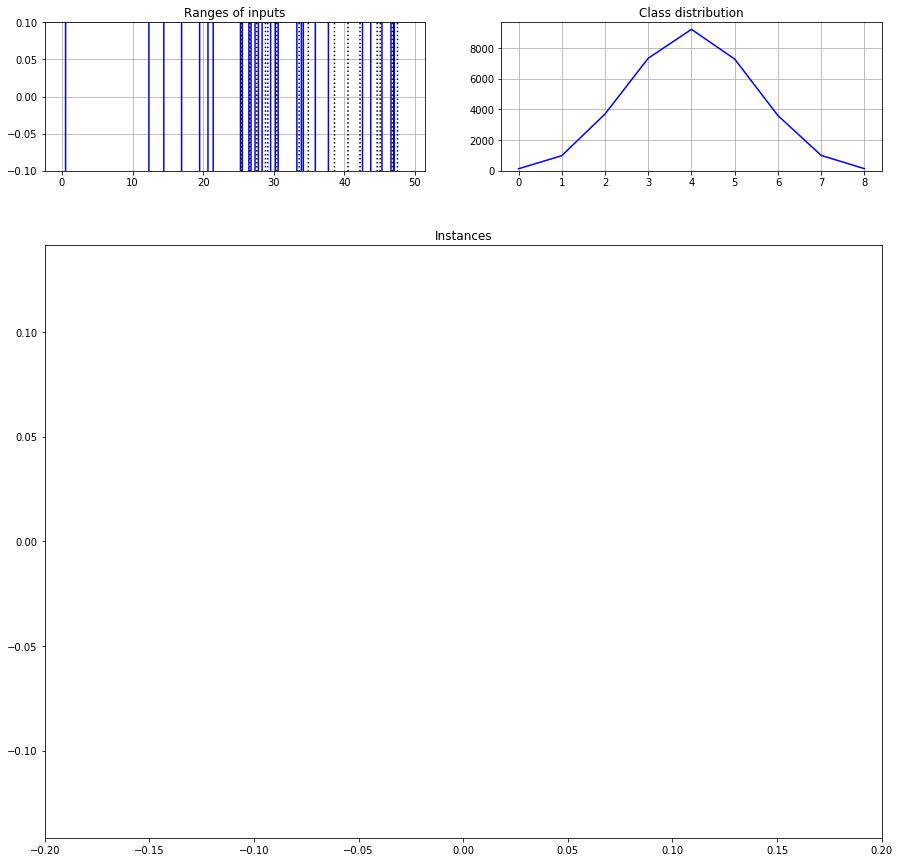

In [35]:
f = analyse_dataset(test_x, test_y)

### Joined

In [36]:
X = np.vstack([train_x, test_x])
Y = np.concatenate([train_y, test_y])

Counter({4.0: 27513, 3.0: 21867, 5.0: 21809, 2.0: 10995, 6.0: 10891, 1.0: 3091, 7.0: 3075, 0.0: 402, 8.0: 357})
Instances: 100000


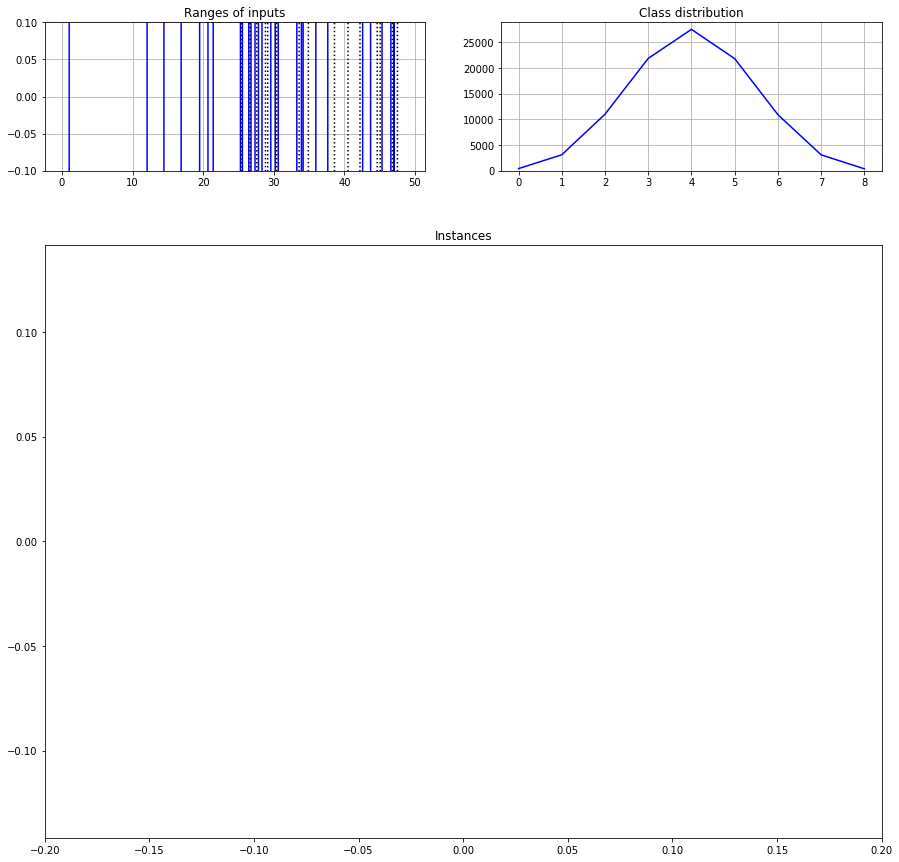

In [37]:
f = analyse_dataset(X, Y)

## 3.2 Noisy - Original byte (256 class)

### Train

In [38]:
train_x, train_y = load(noisy_256class_train)

Counter({246.0: 300, 128.0: 299, 225.0: 297, 88.0: 296, 206.0: 295, 90.0: 294, 48.0: 294, 223.0: 294, 197.0: 293, 149.0: 293, 29.0: 292, 99.0: 289, 103.0: 288, 238.0: 287, 228.0: 287, 45.0: 286, 53.0: 285, 73.0: 285, 102.0: 285, 243.0: 285, 76.0: 285, 28.0: 284, 19.0: 283, 182.0: 283, 104.0: 283, 183.0: 283, 177.0: 282, 26.0: 282, 129.0: 282, 211.0: 282, 159.0: 281, 109.0: 281, 108.0: 281, 253.0: 280, 139.0: 280, 18.0: 279, 3.0: 278, 123.0: 278, 208.0: 278, 240.0: 278, 0.0: 278, 190.0: 277, 116.0: 277, 171.0: 277, 237.0: 276, 32.0: 276, 133.0: 276, 9.0: 276, 168.0: 275, 174.0: 275, 176.0: 275, 192.0: 274, 56.0: 274, 173.0: 274, 98.0: 274, 1.0: 274, 83.0: 274, 131.0: 274, 214.0: 273, 57.0: 273, 213.0: 273, 105.0: 272, 49.0: 272, 34.0: 272, 38.0: 272, 241.0: 272, 169.0: 272, 179.0: 272, 78.0: 272, 207.0: 272, 209.0: 272, 198.0: 271, 47.0: 271, 62.0: 271, 215.0: 270, 218.0: 270, 170.0: 269, 150.0: 269, 126.0: 269, 154.0: 269, 184.0: 269, 226.0: 269, 187.0: 269, 122.0: 268, 138.0: 268, 41.

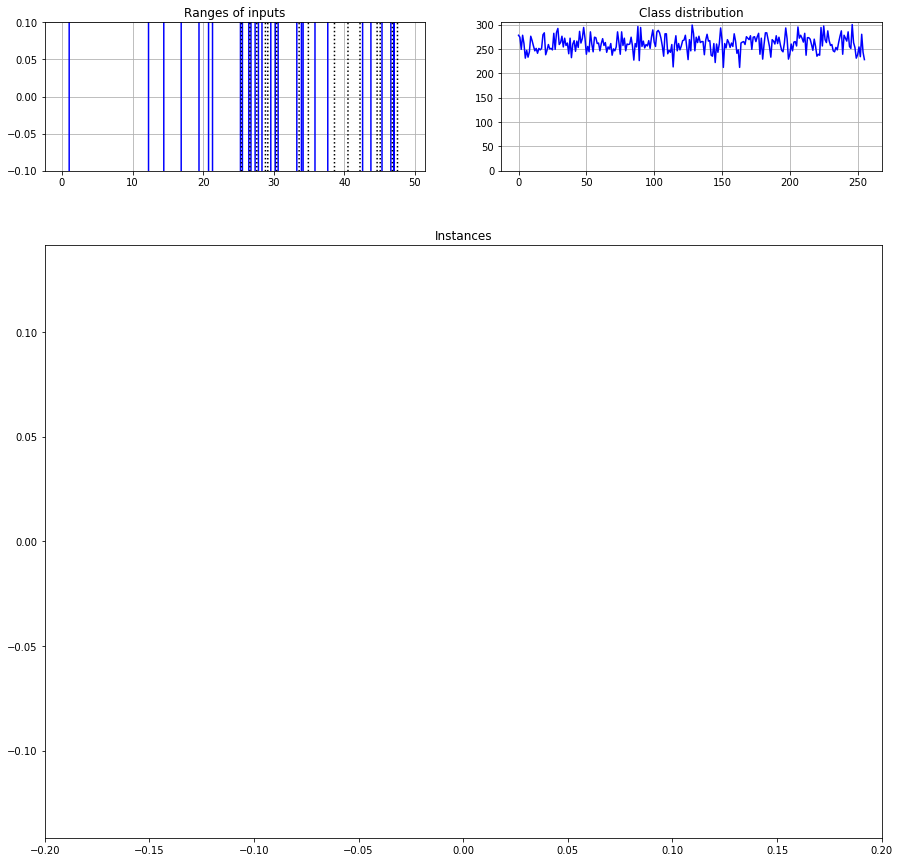

In [39]:
f = analyse_dataset(train_x, train_y)

### Test

In [40]:
test_x, test_y = load(noisy_256class_test)

Counter({38.0: 170, 148.0: 164, 149.0: 162, 200.0: 162, 228.0: 158, 66.0: 158, 211.0: 157, 102.0: 157, 237.0: 156, 53.0: 156, 93.0: 156, 143.0: 154, 204.0: 152, 56.0: 151, 174.0: 149, 164.0: 149, 96.0: 149, 72.0: 149, 65.0: 149, 7.0: 148, 216.0: 148, 120.0: 148, 118.0: 147, 114.0: 147, 140.0: 146, 18.0: 146, 167.0: 145, 213.0: 145, 101.0: 145, 37.0: 144, 109.0: 144, 166.0: 144, 95.0: 144, 182.0: 143, 22.0: 143, 244.0: 143, 49.0: 143, 219.0: 143, 218.0: 142, 71.0: 142, 36.0: 142, 3.0: 142, 152.0: 142, 74.0: 142, 254.0: 141, 88.0: 141, 60.0: 141, 106.0: 140, 245.0: 140, 141.0: 140, 199.0: 140, 117.0: 140, 9.0: 140, 185.0: 140, 25.0: 140, 63.0: 139, 226.0: 139, 132.0: 139, 27.0: 139, 209.0: 138, 123.0: 138, 107.0: 138, 155.0: 138, 62.0: 138, 14.0: 137, 231.0: 137, 6.0: 137, 131.0: 137, 15.0: 137, 138.0: 137, 126.0: 137, 225.0: 137, 59.0: 137, 70.0: 136, 160.0: 136, 99.0: 136, 206.0: 136, 252.0: 136, 184.0: 136, 250.0: 136, 94.0: 136, 234.0: 136, 92.0: 136, 42.0: 136, 178.0: 135, 188.0: 13

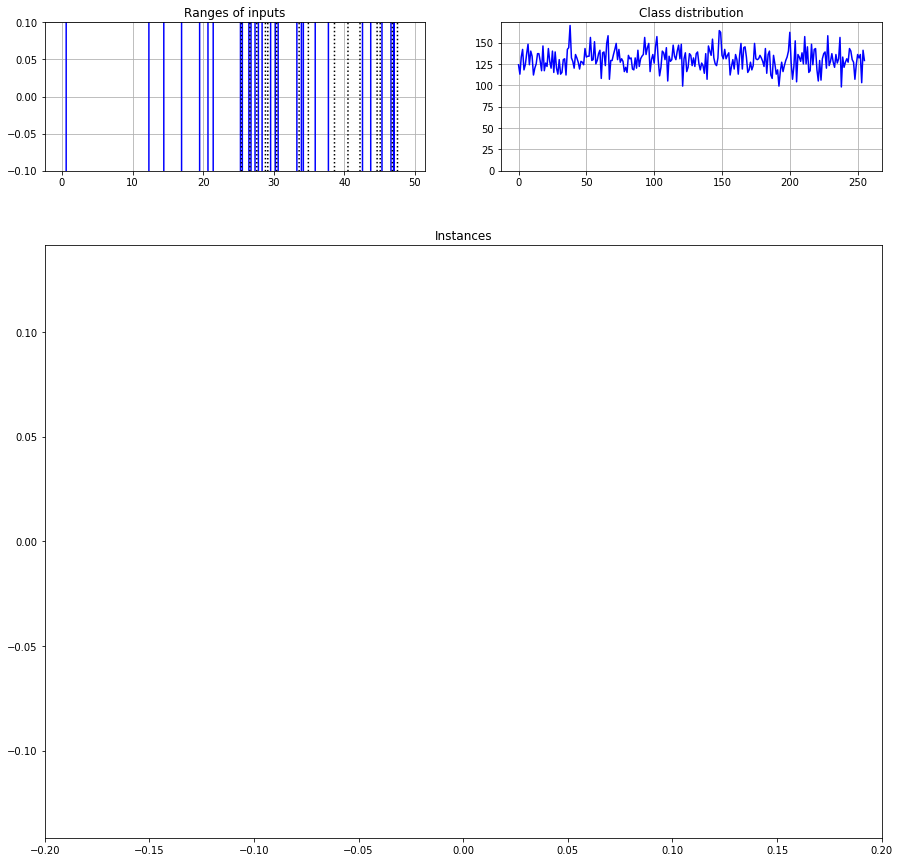

In [41]:
f = analyse_dataset(test_x, test_y)

### Joined

In [42]:
X = np.vstack([train_x, test_x])
Y = np.concatenate([train_y, test_y])

Counter({149.0: 455, 228.0: 445, 102.0: 442, 38.0: 442, 53.0: 441, 211.0: 439, 88.0: 437, 225.0: 434, 237.0: 432, 206.0: 431, 246.0: 430, 182.0: 426, 56.0: 425, 18.0: 425, 90.0: 425, 109.0: 425, 99.0: 425, 174.0: 424, 148.0: 424, 128.0: 422, 197.0: 422, 3.0: 420, 48.0: 418, 213.0: 418, 204.0: 417, 103.0: 417, 123.0: 416, 9.0: 416, 96.0: 416, 76.0: 416, 73.0: 415, 49.0: 415, 129.0: 414, 177.0: 413, 140.0: 412, 243.0: 412, 218.0: 412, 66.0: 412, 164.0: 411, 108.0: 411, 131.0: 411, 209.0: 410, 166.0: 409, 62.0: 409, 168.0: 408, 118.0: 408, 226.0: 408, 93.0: 408, 141.0: 407, 216.0: 407, 116.0: 407, 126.0: 406, 208.0: 406, 83.0: 406, 45.0: 405, 29.0: 405, 184.0: 405, 74.0: 405, 207.0: 405, 176.0: 405, 138.0: 405, 150.0: 404, 198.0: 404, 167.0: 404, 98.0: 404, 154.0: 404, 120.0: 404, 28.0: 404, 179.0: 404, 171.0: 404, 36.0: 404, 152.0: 403, 34.0: 403, 72.0: 403, 92.0: 402, 160.0: 402, 22.0: 402, 132.0: 402, 0.0: 402, 188.0: 401, 155.0: 401, 10.0: 401, 133.0: 401, 200.0: 401, 19.0: 400, 95.0:

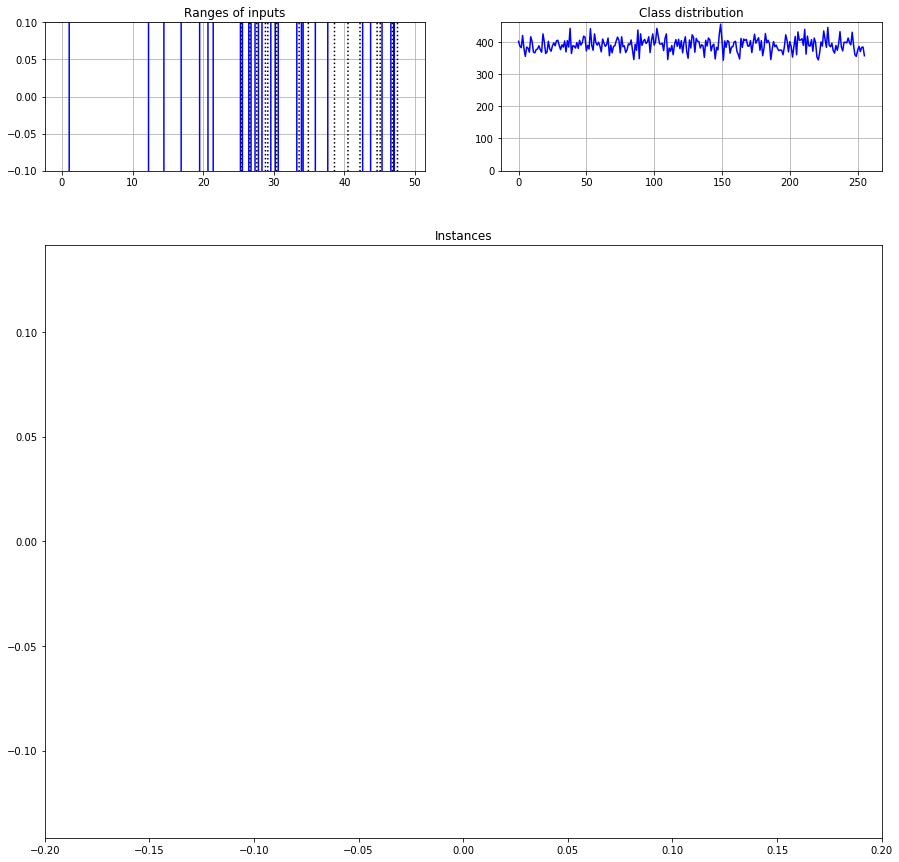

In [43]:
f = analyse_dataset(X, Y)

# 4. Preprocessing

## 4.1 How to turn large input values (transformed) to standard decimal format?
**Answer: You divide them all by 1e6!**

The results show some slight numerical differences from the original.

In [44]:
ds_small = "../../res/noiseless_orig/5k/9class/noiseless_9class_5k_test.arff"
ds_large = "../../res/noiseless_orig/5k/9class/noiseless_9class_5k_test_transform.arff"

small_x, small_y = load(ds_small)
large_x, large_y = load(ds_large)

### Original dataset (noiseless, 5k, 9class)

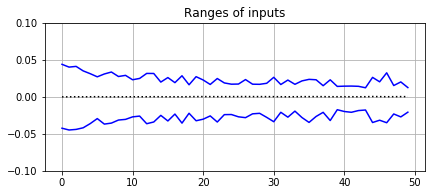

In [45]:
f = analyse_dataset(small_x, small_y, True, False, False)

### So called: "transformed" dataset (noiseless, 5k, 9class)

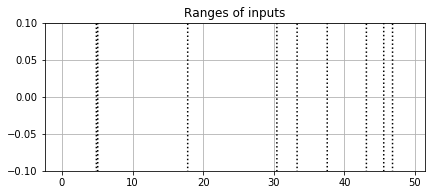

In [46]:
f = analyse_dataset(large_x, large_y, True, False, False)

### Difference from original (numerical error)

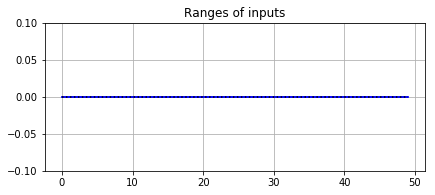

In [47]:
scaled_large_x = large_x * 1e-6        
f = analyse_dataset(scaled_large_x - small_x, small_y, True, False, False)

## 4.2 Effect of standardization on both
To check is it necessary to scale at all.

In [48]:
from sklearn.preprocessing import StandardScaler, scale

small_x, small_y = load(ds_small)
large_x, large_y = load(ds_large)

small_x_sc = scale(small_x)
large_x_sc = scale(large_x)

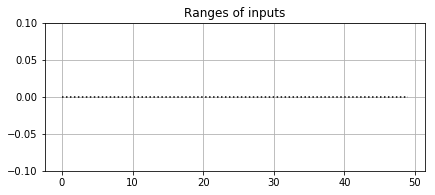

In [49]:
f = analyse_dataset(small_x_sc, small_y, True, False, False)

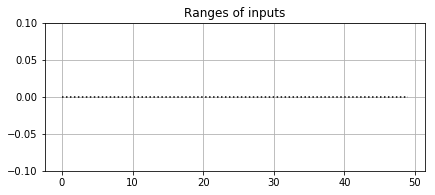

In [50]:
f = analyse_dataset(large_x_sc, large_y, True, False, False)

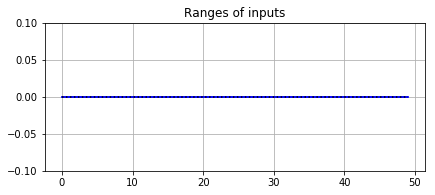

In [51]:
f = analyse_dataset(large_x_sc - small_x_sc, small_y, True, False, False)